In [55]:
import matplotlib
# matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import matplotlib.gridspec as gridspec
import spectral_analysis as sa
from scipy.special import erf
import datafidelity as df
import composite

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [67]:
all_uv = "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where source='uv' or source='swift_uv' or source ='foley_hst' and ((dm15_source between 0 and 2.5) or (dm15_from_fits between 0 and 2.5))"
SN_Array = composite.grab(all_uv, multi_epoch = True, make_corr = False)
for SN in SN_Array:
    if SN.minwave < 2800.:
        print SN.name, SN.filename, SN.phase, SN.dm15_source, SN.dm15_from_fits, SN.source, SN.minwave

ERROR:  sn1992a-19920116.220-iue.flm None
194 valid SNe found
Arrays cleaned
1980n sn1980n-19801211.724-iue.flm -1.79844135083 None 1.13157052606 uv 1886.11
1980n sn1980n-19801213.495-iue.flm 0.189885184083 None 1.13157052606 uv 1875.44
1980n sn1980n-19801216.147-iue.flm 3.17237498645 None 1.13157052606 uv 1883.44
1980n sn1980n-19801217.712-iue.flm 4.16653825391 None 1.13157052606 uv 1883.44
1980n sn1980n-19801223.371-iue.flm 10.1315178587 None 1.13157052606 uv 1899.46
1980n sn1980n-19801224.831-iue.flm 11.1256811261 None 1.13157052606 uv 1923.48
1980n sn1980n-19810116.810-iue.flm 33.9914362776 None 1.13157052606 uv 1899.28
1981b sn1981b-19810309.295-iue.flm 0.959214974485 None 1.05664955847 uv 1910.13
1981b sn1981b-19810310.460-iue.flm 1.9532201294 None 1.05664955847 uv 1891.45
1981b sn1981b-19810311.597-iue.flm 2.94722528431 None 1.05664955847 uv 1862.09
1986g sn1986g-19860506.685-iue.flm 10.5237940758 None 0.804213506829 uv 1994.97
1986g sn1986g-19860508.146-iue.flm 12.5201507249 No

In [68]:
print 'Need Phases:'
for SN in SN_Array:
    if SN.phase == None:
        print SN.name, SN.filename, SN.phase, SN.dm15_source, SN.dm15_from_fits, SN.source, SN.minwave
print
print 'Need dm15s:'
for SN in SN_Array:
    if SN.dm15_source == None and SN.dm15_from_fits == None:
        print SN.name, SN.filename, SN.phase, SN.dm15_source, SN.dm15_from_fits, SN.source, SN.minwave

Need Phases:
1989m sn1989m-19890706.988-iue.flm None None None uv 1981.65
1989m sn1989m-19890708.569-iue.flm None None None uv 1960.35
1989m sn1989m-19890712.735-iue.flm None None None uv 2034.91
1989m sn1989m-19890714.058-iue.flm None None None uv 2048.22
1989m sn1989m-19890717.730-iue.flm None None None uv 2013.6
1989m sn1989m-19890720.034-iue.flm None None None uv 2064.19
1990m sn1990m-19900615.836-iue.flm None None None uv 2013.62
1990m sn1990m-19900618.493-iue.flm None None None uv 1981.66
2003bf sn2003bf-20030310.820-hst.flm None None None uv 1710.0
2003bf sn2003bf-20030317.577-hst.flm None None None uv 1670.0
2003bf sn2003bf-20030324.245-hst.flm None None None uv 1805.0
2003bt sn2003bt-20030317.713-hst.flm None None None uv 1690.0

Need dm15s:
1989m sn1989m-19890706.988-iue.flm None None None uv 1981.65
1989m sn1989m-19890708.569-iue.flm None None None uv 1960.35
1989m sn1989m-19890712.735-iue.flm None None None uv 2034.91
1989m sn1989m-19890714.058-iue.flm None None None uv 204

In [3]:
test_uv_query = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase between -3 and 3 and source='uv' or source='swift_uv' or source ='foley_hst' and ((dm15_source between 0 and 2.5) or (dm15_from_fits between 0 and 2.5))"]
comp_test_uv, sn_arrays_test_uv, boot_sn_arrays_test_uv = query_db.main(len(test_uv_query), test_uv_query, boot='nb', medmean=2, verbose=True, multi_epoch=False, selection='max_coverage')

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase between -3 and 3 and source='uv' or source='swift_uv' or source ='foley_hst' and ((dm15_source between 0 and 2.5) or (dm15_from_fits between 0 and 2.5))
172 questionable files currently ignored
Generate variance failed for:  [u'sn2004dt-20040820-hst.flm', u'sn2004ef-20040914-hst.flm', u'sn2004ef-20040918-hst.flm', u'sn2005cf-20050611-hst.flm', u'sn2005cf-20050614-hst.flm']
(11, 'questionable spectra removed', 112, 'spectra left')
(0, 'Peculiar Ias removed', 112, 'spectra left')
72 spectra with host corrections
172 questionable files currently ignored
17 valid SNe found
Arrays cleaned
0 spectra may have telluric contamination
1980n sn1980n-19801211.724-iue.flm 1.22286925385 None 1.13157052606 -1.79844135083 0.005871 uv 1926.0 3180.0 11.0
1981b sn1981b-19810311.597-iue.flm 1.61788881452 None 1.05664955847 2.94722528431 0.006031 uv 1902.0 3230.0 11.0
1990n sn1990n-19900709.730-iue.flm 2.

composite.py:1005: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template.RMSE != None:


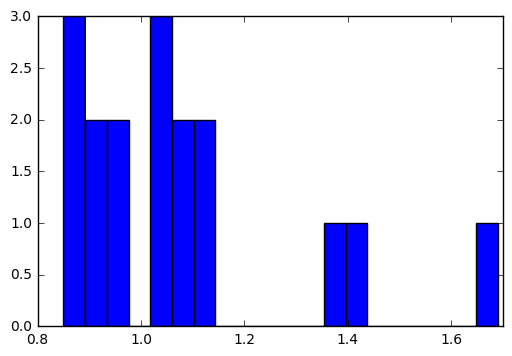

In [4]:
dm15s = []
for SN in sn_arrays_test_uv[0]:
    if SN.dm15_source != None:
        dm15s.append(SN.dm15_source)
    else:
        dm15s.append(SN.dm15_from_fits)
plt.hist(dm15s, bins = 20)
plt.show()

In [5]:
query_dm15_max_fewer_bins = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source < .95 or dm15_from_fits < .95))",
                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15))",
                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.15 and dm15_source < 1.25) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.25))",
                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.25 and dm15_source < 1.42) or (dm15_from_fits >= 1.25 and dm15_from_fits < 1.42))",
                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.42 and dm15_source < 1.7) or (dm15_from_fits >= 1.42 and dm15_from_fits < 1.7))",
                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.7 or dm15_from_fits >= 1.7))"]
# query_dm15_max_fewer_bins = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 2 and ((dm15_source < .95 or dm15_from_fits < .95)) and source != 'swift_uv'",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 2 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15)) and source != 'swift_uv'",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 2 and ((dm15_source >= 1.15 and dm15_source < 1.25) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.25)) and source != 'swift_uv' and Supernovae.SN not in ('2006x', '2008ia')",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 2 and ((dm15_source >= 1.25 and dm15_source < 1.42) or (dm15_from_fits >= 1.25 and dm15_from_fits < 1.42)) and source != 'swift_uv'",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 2 and ((dm15_source >= 1.42 and dm15_source < 1.7) or (dm15_from_fits >= 1.42 and dm15_from_fits < 1.7)) and source != 'swift_uv'",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 2 and ((dm15_source >= 1.7 or dm15_from_fits >= 1.7)) and source != 'swift_uv'"]
# query_dm15_max_fewer_bins = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and (dm15_cfa < .9 or dm15_from_fits < .9)",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_cfa >= .9 and dm15_cfa < 1.) or (dm15_from_fits >= .9 and dm15_from_fits < 1))",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_cfa >= 1 and dm15_cfa < 1.05) or (dm15_from_fits >= 1 and dm15_from_fits < 1.05))",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_cfa >= 1.05 and dm15_cfa < 1.1) or (dm15_from_fits >= 1.05 and dm15_from_fits < 1.1))",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_cfa >= 1.1 and dm15_cfa < 1.2) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.2))",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_cfa >= 1.2 and dm15_cfa < 1.3) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.3))", 
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_cfa >= 1.3 and dm15_cfa < 1.4) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.4))", 
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_cfa >= 1.4 and dm15_cfa < 1.6) or (dm15_from_fits >= 1.4 and dm15_from_fits < 1.6))",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and (dm15_cfa >= 1.6 or dm15_from_fits >= 1.6)"]

In [6]:
comps_dm15_max_fewer_bins_med, sn_arrays_med, boot_sn_arrays_med = query_db.main(len(query_dm15_max_fewer_bins), query_dm15_max_fewer_bins, boot='b', medmean=2, verbose=True, multi_epoch=False, selection='max_coverage_add_uv')

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source < .95 or dm15_from_fits < .95))
172 questionable files currently ignored
(1, 'questionable spectra removed', 83, 'spectra left')
(0, 'Peculiar Ias removed', 83, 'spectra left')
80 spectra with host corrections
172 questionable files currently ignored
30 valid SNe found
Arrays cleaned
0 spectra may have telluric contamination
1994s sn1994s-19940616-uoi.flm 34.8321198485 0.94 None 0.998840596273 0.015177 bsnip 3124.0 11082.0 11.0
1998es sn1998es-19981125-ui-corrected.flm 107.924025303 0.85 None 0.496750833938 0.010567 bsnip 3346.0 10044.0 8.0
1999aa sn1999aa-19990223-ui.flm 51.2219895768 0.78 None 0.460351148368 0.014443 bsnip 3344.0 10350.0 14.0
2001cp sn2001cp-20010629-ui.flm 23.7501402626 0.88 None 0.917447344588 0.022402 bsnip 3278.0 10124.0 13.0
2001eh sn2001eh-20010920-ui.flm 38.447282377 0.92 None 2.59682402539 0.037036 bsnip 3234.0 9980.0 1

In [7]:
SN = sn_arrays_med[0][0]
print np.median(SN.ivar[SN.x1:SN.x2])

47470.1228164


In [28]:
# comps_dm15_max_fewer_bins_mean, sn_arrays_mean, boot_sn_arrays_mean = query_db.main(len(query_dm15_max_fewer_bins), query_dm15_max_fewer_bins, boot='b', medmean=1)
comps_dm15_max_fewer_bins_mean, sn_arrays_mean, boot_sn_arrays_mean = query_db.main(len(query_dm15_max_fewer_bins), query_dm15_max_fewer_bins, boot='b', medmean=1, selection='max_coverage_add_uv', gini_balance=True, verbose=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source < .95 or dm15_from_fits < .95))
172 questionable files currently ignored
(1, 'questionable spectra removed', 83, 'spectra left')
(0, 'Peculiar Ias removed', 83, 'spectra left')
80 spectra with host corrections
172 questionable files currently ignored
30 valid SNe found
Arrays cleaned
0 spectra may have telluric contamination
1994s sn1994s-19940616-uoi.flm 34.8321198485 0.94 None 0.998840596273 0.015177 bsnip 3124.0 11082.0 11.0
1998es sn1998es-19981125-ui-corrected.flm 107.924025303 0.85 None 0.496750833938 0.010567 bsnip 3346.0 10044.0 8.0
1999aa sn1999aa-19990223-ui.flm 51.2219895768 0.78 None 0.460351148368 0.014443 bsnip 3344.0 10350.0 14.0
2001cp sn2001cp-20010629-ui.flm 23.7501402626 0.88 None 0.917447344588 0.022402 bsnip 3278.0 10124.0 13.0
2001eh sn2001eh-20010920-ui.flm 38.447282377 0.92 None 2.59682402539 0.037036 bsnip 3234.0 9980.0 1

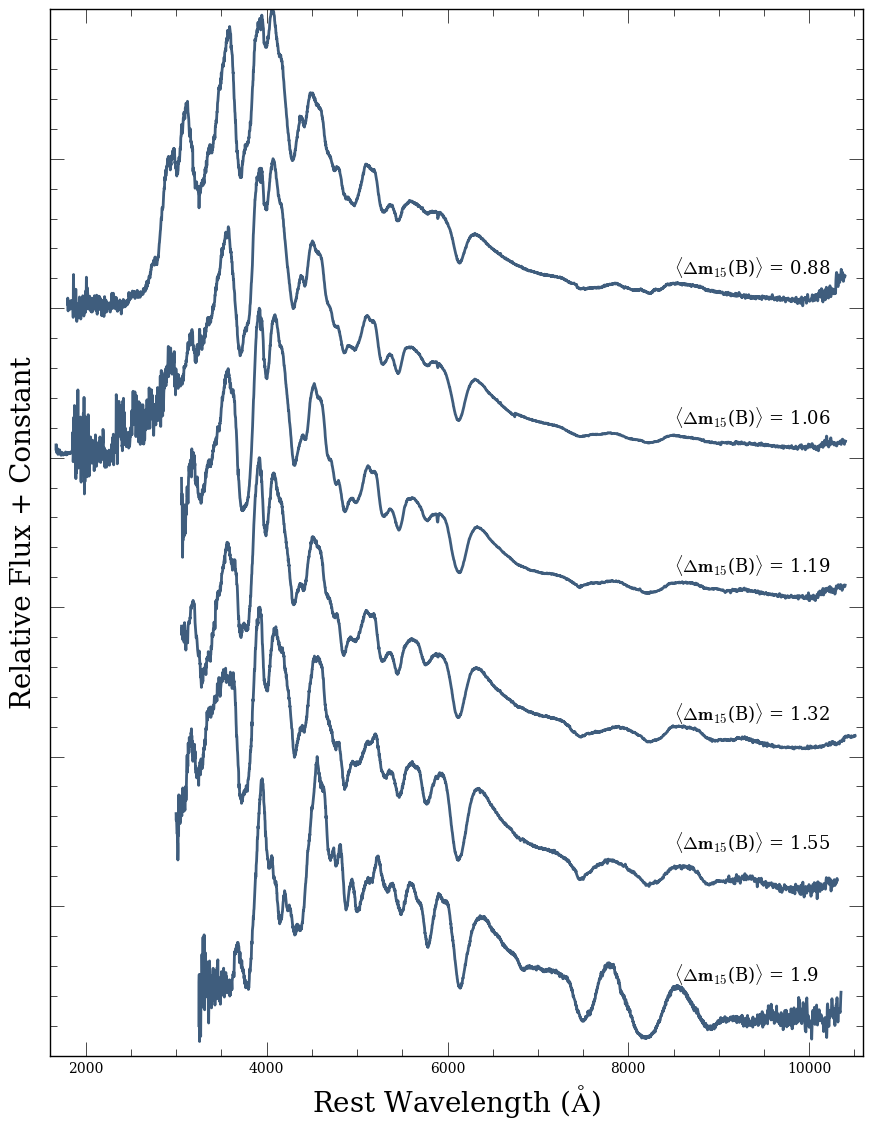

In [9]:
query_db.set_min_num_spec(comps_dm15_max_fewer_bins_mean, 2)
query_db.stacked_plot(comps_dm15_max_fewer_bins_mean, savename = 'main_composites_updated/dm15_split_max')
# query_db.stacked_plot(comps_dm15_max_fewer_bins_mean)

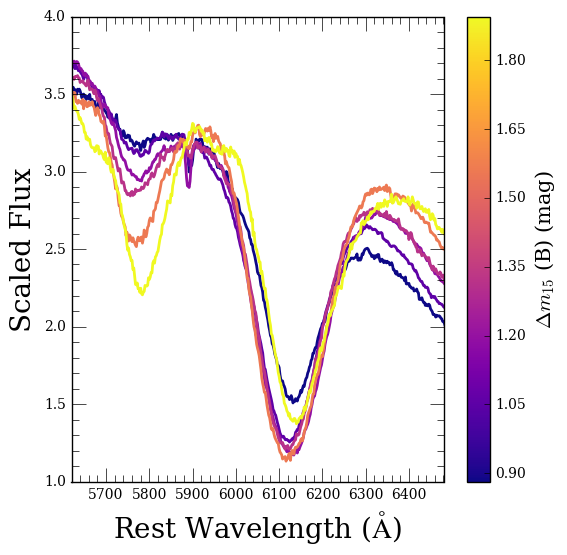

In [13]:
query_db.si_plot(comps_dm15_max_fewer_bins_mean, savename = 'main_composites_updated/si_region')

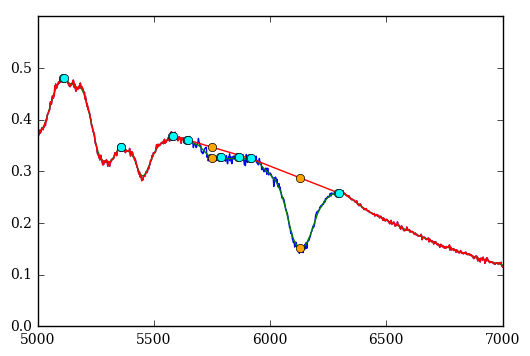

0.89 0.154055549138


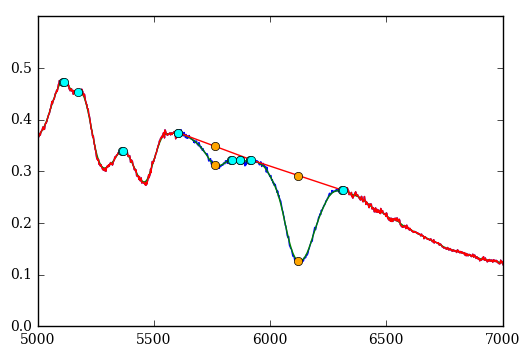

1.07 0.215450425703


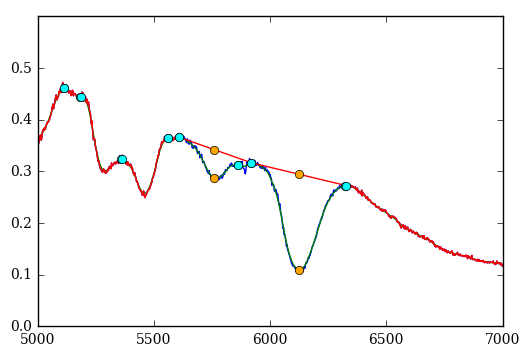

1.2 0.291269785089


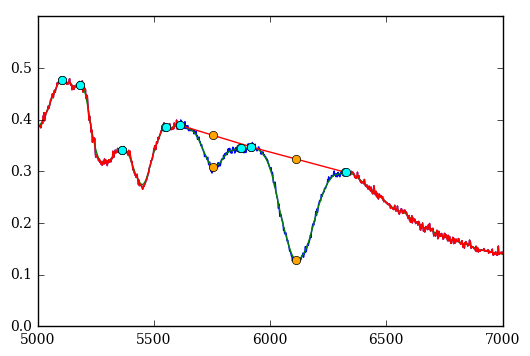

1.32 0.318493219381


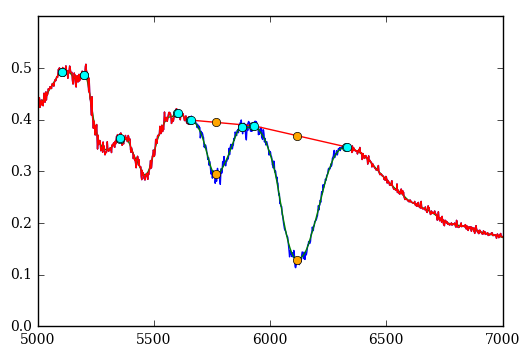

1.59 0.419191404975


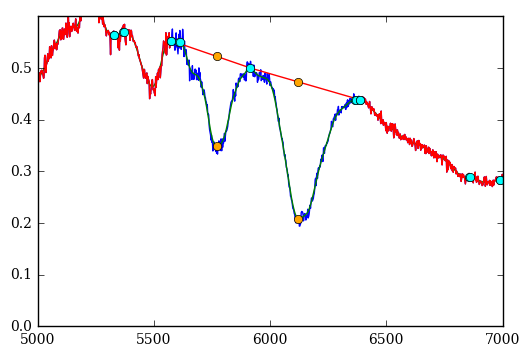

1.89 0.656044433248


In [14]:
si_ratios_med = []
phases_med = []
dm15s_med = []
for comp in comps_dm15_max_fewer_bins_med:
    p = np.average(comp.phase_array[comp.x1:comp.x2])
    dm15 = np.round(np.nanmean(comp.dm15_array[comp.x1:comp.x2]),2)
    r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.002, dm15=dm15)
    print dm15, r
    phases_med.append(p)
    dm15s_med.append(dm15)
    si_ratios_med.append(r)

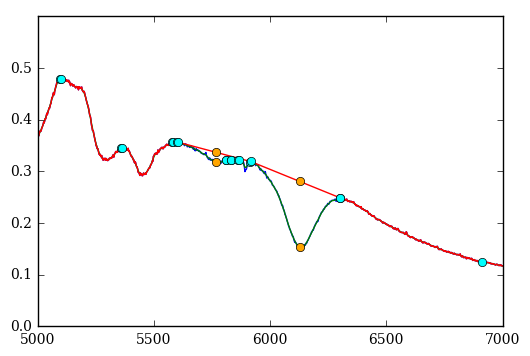

0.88 0.150084932924


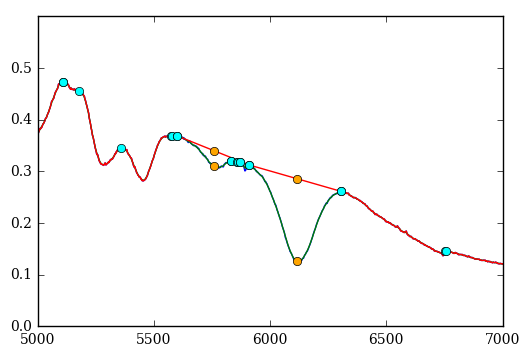

1.06 0.181846330214


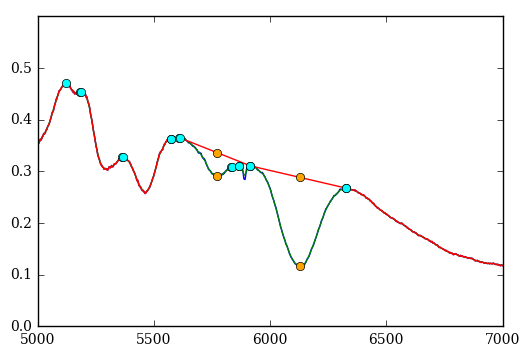

1.19 0.267919289293


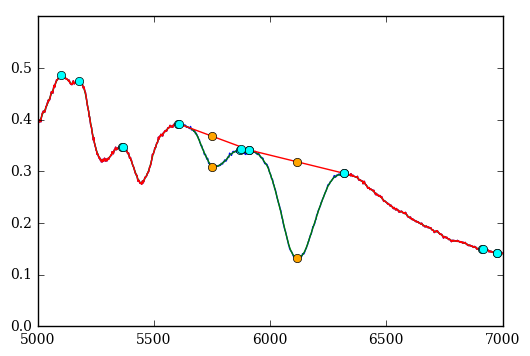

1.33 0.317863416072


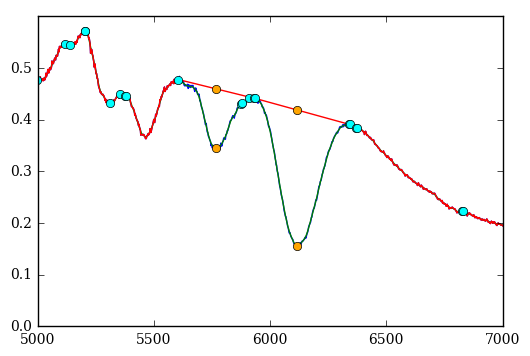

1.56 0.438859045957


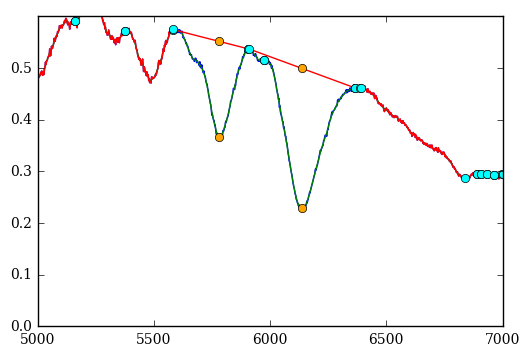

1.9 0.685717598114


In [29]:
si_ratios_mean = []
phases_mean = []
dm15s_mean = []
for comp in comps_dm15_max_fewer_bins_mean:
    p = np.average(comp.phase_array[comp.x1:comp.x2])
    dm15 = np.round(np.nanmean(comp.dm15_array[comp.x1:comp.x2]),2)
    r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, dm15=dm15)
    print dm15, r
    phases_mean.append(p)
    dm15s_mean.append(dm15)
    si_ratios_mean.append(r)

In [32]:
boot_ratios_med = []
errors_med  = []
percentile = erf(1/np.sqrt(2.))
low_pc = 0.5 - percentile*0.5
up_pc = 0.5 + percentile*0.5
# for k in range(len(boot_sn_arrays[0:27])):
for k in range(len(boot_sn_arrays_med)):
    rs = []
    print k
    for comp in boot_sn_arrays_med[k]:
        r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.002, plot=False)
        if ~np.isnan(r):
            rs.append(r)
    boot_ratios_med.append(rs)

0
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
1
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
2
3
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
4
5
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range

In [31]:
boot_ratios_mean = []
errors_mean  = []
percentile = erf(1/np.sqrt(2.))
low_pc = 0.5 - percentile*0.5
up_pc = 0.5 + percentile*0.5
# for k in range(len(boot_sn_arrays[0:27])):
for k in range(len(boot_sn_arrays_mean)):
    rs = []
    print k
    for comp in boot_sn_arrays_mean[k]:
        r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False)
        if ~np.isnan(r):
            rs.append(r)
    boot_ratios_mean.append(rs)

0
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
89
1
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
92
2
100
3
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified

In [33]:
low_errors = []
up_errors = []
boot_resids = []
boot_ratios_med = np.asarray(boot_ratios_med)
for j in range(len(boot_ratios_med)):
    r_resids = []
    r_resids.append(boot_ratios_med[j] - si_ratios_med[j])
    resid_sort = np.sort(r_resids)[0]
    boot_resids.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors.append(np.absolute(resid_sort[low_ind]))
    up_errors.append(resid_sort[up_ind])
#     errors.append(np.nanstd(rs))
errors_med = [low_errors, up_errors]

In [34]:
low_errors = []
up_errors = []
boot_resids = []
boot_ratios_mean = np.asarray(boot_ratios_mean)
for j in range(len(boot_ratios_mean)):
    r_resids = []
    r_resids.append(boot_ratios_mean[j] - si_ratios_mean[j])
    resid_sort = np.sort(r_resids)[0]
    boot_resids.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors.append(np.absolute(resid_sort[low_ind]))
    up_errors.append(resid_sort[up_ind])
#     errors.append(np.nanstd(rs))
errors_mean = [low_errors, up_errors]

0
0.115011819054 47470.1228164


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: divide by zero encountered in divide


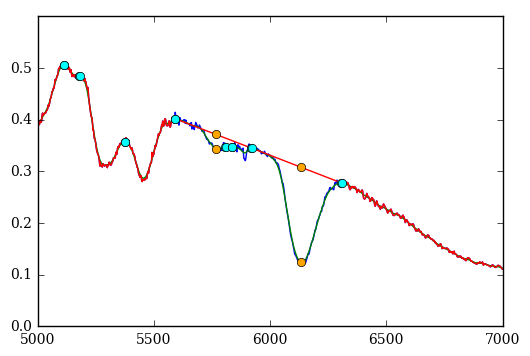

sn1994s-19940616-uoi.flm 0.94 0.152188124175 Check:  0.002 42.1017919054 34.8321198485
0.167996703749 13087.2390812


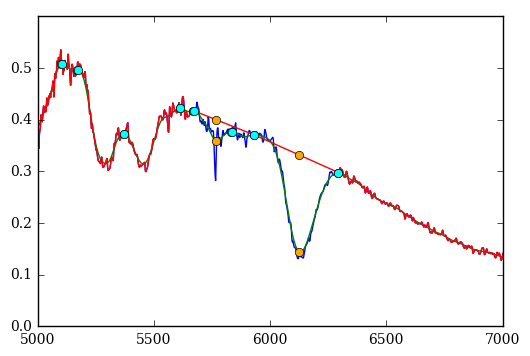

sn2001cp-20010629-ui.flm 0.88 0.220170450241 Check:  0.003 25.8994828348 23.7501402626
0.179696832471 43572.323236


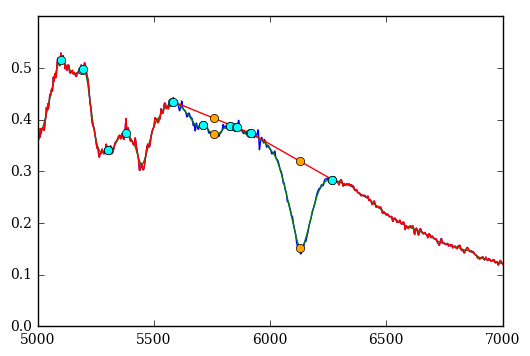

sn2001eh-20010920-ui.flm 0.92 0.187837681295 Check:  0.002 40.3523306269 38.447282377
0.120027381701 80925.8350687


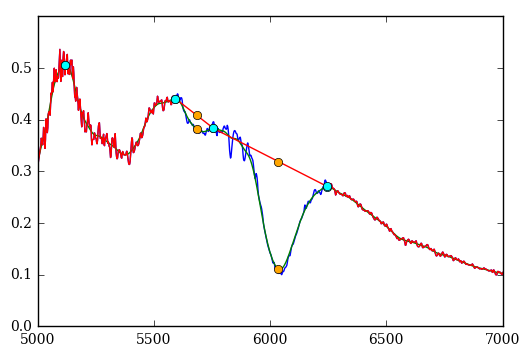

sn2002cd-20020420-ui-corrected.flm 0.84 0.127837269437 Check:  0.003 27.5989214926 25.7022215808
0.129793091491 55135.8414714


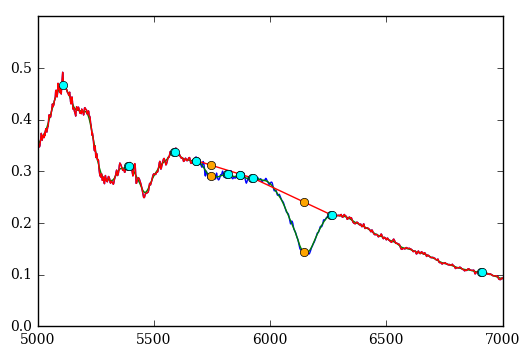

sn2005eq-20051011.376-ui-corrected.flm 0.88 0.209846664919 Check:  0.002 40.6050100926 39.5694055064
0.154840006502 3854.07164738


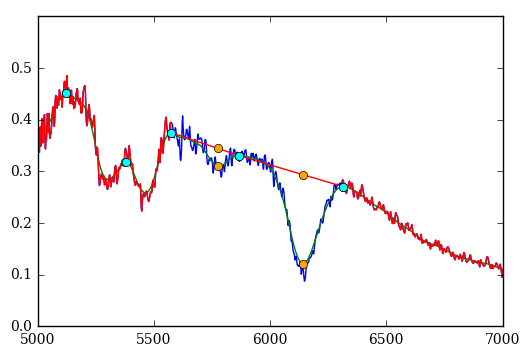

sn2006cq-20060605.307-ui.flm 0.938834805412 0.19680433604 Check:  0.004 13.1588709961 10.9565777676
0.192707720771 57913.1750778


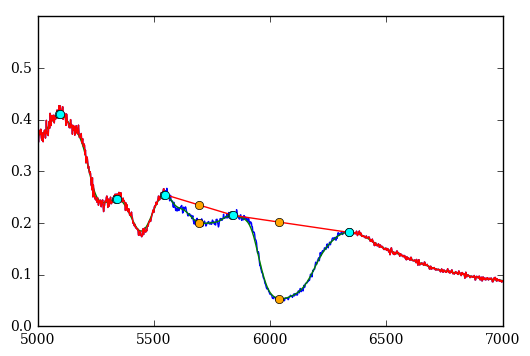

sn2006ot-20061123.362-br.flm 0.84 0.229382613826 Check:  0.003 37.1051906457 37.8918352052
0.159447890834 7084.25839863


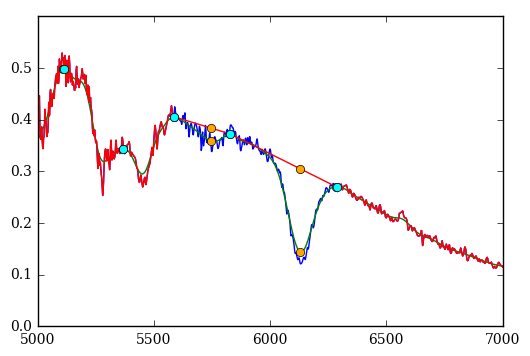

sn2006s-20060206.517-ui.flm 0.93 0.154424777606 Check:  0.004 16.7311651418 14.1443147205
0.394863656795 5827.02843015


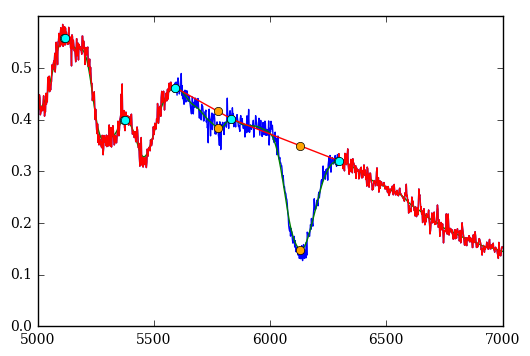

sn1996C-19960217.48-fast.flm 0.93 0.162627985708 Check:  0.003 25.6361006969 27.3447953372
0.369197290118 10139.0099087


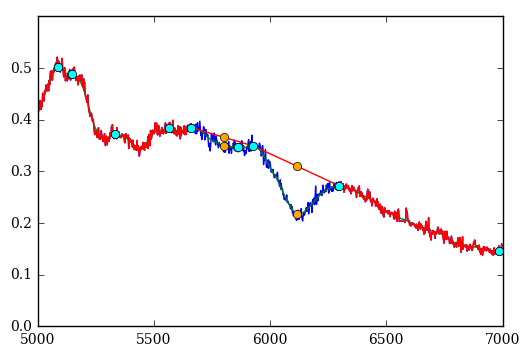

sn1999gp-20000105.10-fast.flm 0.87 0.188756540618 Check:  0.003 32.5859833351 33.6898092142
0.313596863629 136319.697163


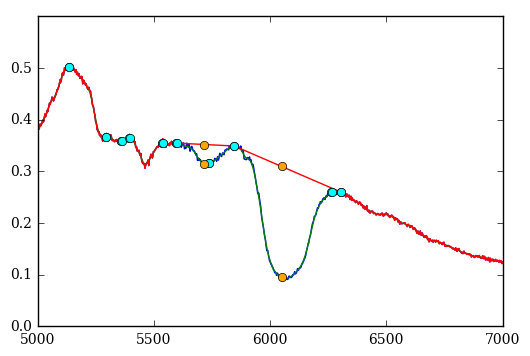

sn2001ay-20010426.41-mmt.flm 0.68 0.177428578819 Check:  0.0015 92.4549843865 95.381385481
0.369437584686 8753.22213779


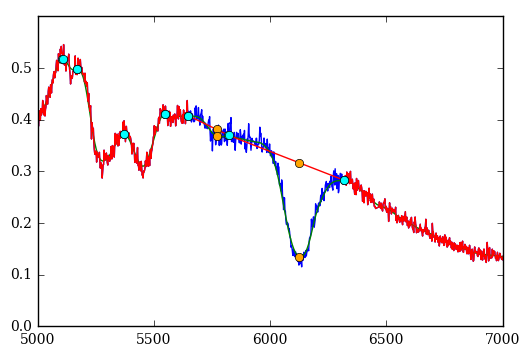

sn2002jy-20021226.12-fast.flm 0.88 0.0739330422885 Check:  0.003 29.3658455292 31.1657537787
0.34703600839 5269.77380677


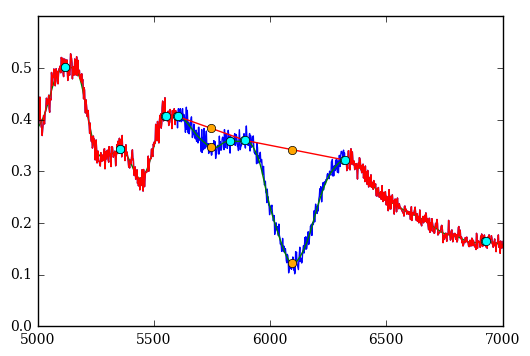

sn2004as-20040319.28-fast.flm 0.92 0.166825286697 Check:  0.003 24.491459393 25.3709021264
0.280154803438 14447.2519409


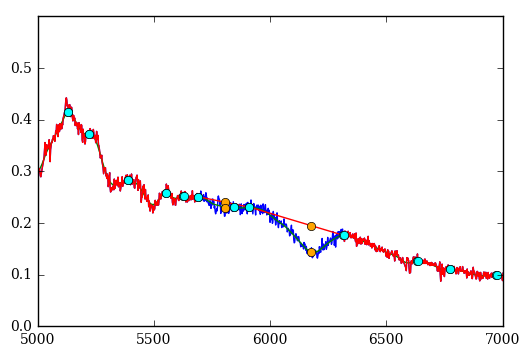

sn2005M-20050202.34-fast.flm 0.87 0.217102282651 Check:  0.003 30.2299833192 31.6856249275
0.408891345956 810.865339489


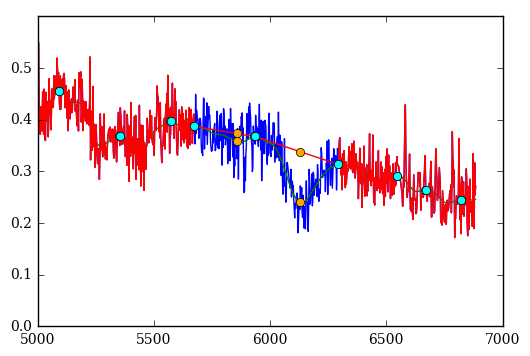

sn2006cj-20060522.29-fast.flm 0.81 0.156921329559 Check:  0.004 10.4608862356 11.1533728453
0.304108926779 2167.03097902
Could not find maximum in a specified range!
sn2006gr-20061002.26-fast.flm 0.81 nan Check:  0.004 13.1855877904 13.8208014383
0.356081754834 1360.845241


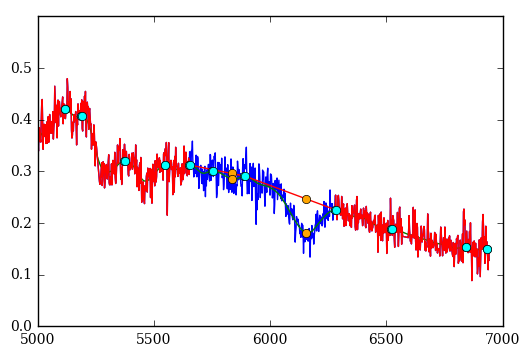

sn2006oa-20061125.08-fast.flm 0.89 0.164836112709 Check:  0.004 12.0325490819 12.6156923403
0.168008141648 10409.0556229


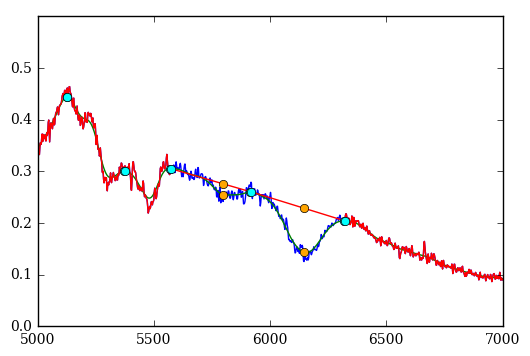

SN07ai_070314_b01_DUP_BC.dat 0.852109516951 0.244401714146 Check:  0.004 18.837575125 20.0883943654
0.157115499981 56655.5576465


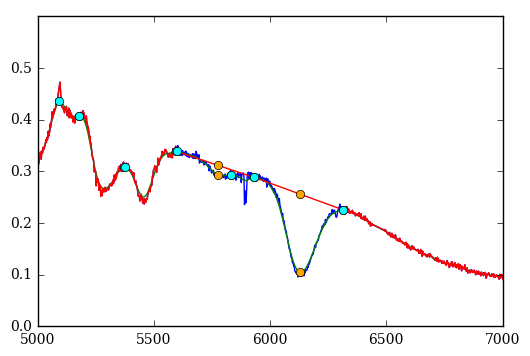

SN07ca_070508_b01_BAA_IM.dat 0.89 0.123813725588 Check:  0.003 34.3085599945 32.9253573263
0.090116437897 428.086379997
Could not find maximum in a specified range!
sn1990n-19900709.730-iue.flm 0.943599627942 nan Check:  0.0045 4.58780441426 2.21678966512
0.137706161008 640.411381628
Could not find maximum in a specified range!
sn1991t-19910427.424-iue.flm 0.898541050009 nan Check:  0.004 7.66166464793 5.0578381885
0.433138484813 34207.035018
Could not find maximum in a specified range!
sn2012cg-visit1-hst.flm 0.86 nan Check:  0.0015 84.0869883656 93.4185750256
0.148910315669 29634.0442838


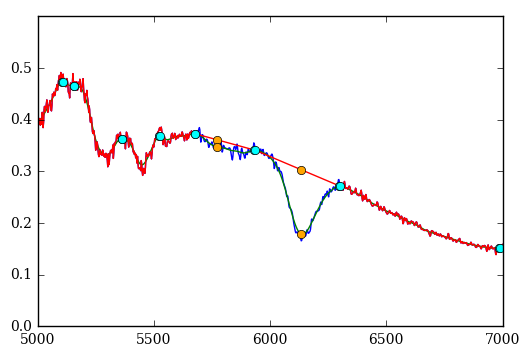

sn2013dy-visit2-hst.flm 0.92 0.113442803049 Check:  0.003 29.3911488923 27.4637639884
1
0.153853166735 714088.762643


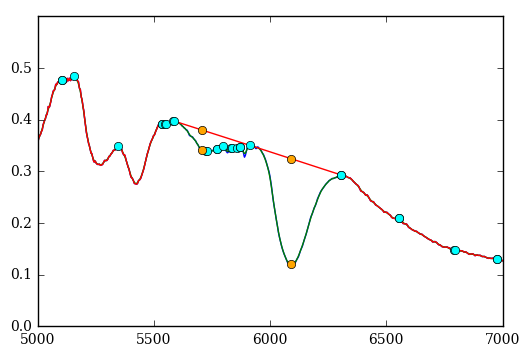

sn1998dk-19980831-ui.flm 1.05 0.193155616993 Check:  0.001 151.885830348 138.561375893
0.149997960585 30028.86495


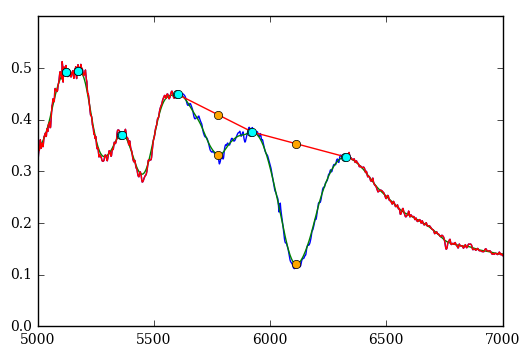

sn2001da-20010716-ui-corrected.flm 1.12 0.333341941158 Check:  0.003 35.3326830058 31.2742199204
0.13590290042 442126.553739


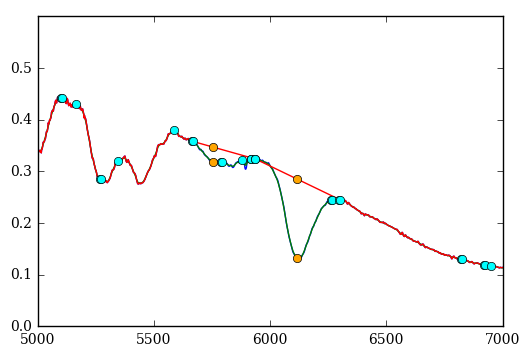

sn2001fe-20011115-ui.flm 1.0 0.182431502776 Check:  0.001 107.58803315 97.0469826578
0.122832676307 72819.8575573


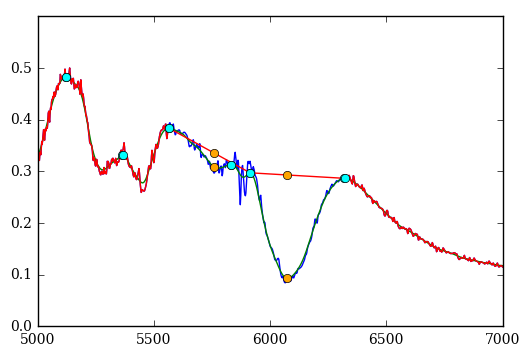

sn2002bo-20020322-ui-corrected.flm 1.08 0.135698468154 Check:  0.003 30.6167572038 28.4486821751
0.139033596225 2105.2148759


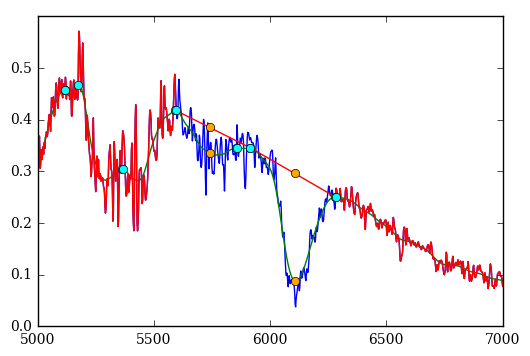

sn2002de-20020608.374-ui-corrected.flm 0.96 0.24207144734 Check:  0.004 9.45655772761 7.45799112642
0.141893496355 229628.171096


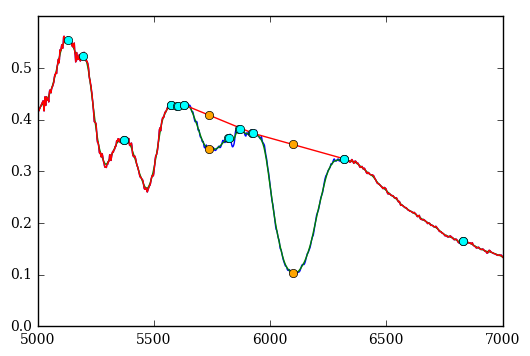

sn2004fu-20041119-ui.flm 1.08 0.260888624056 Check:  0.0015 64.3413758165 60.0448394656
0.262747101641 1562.19663562


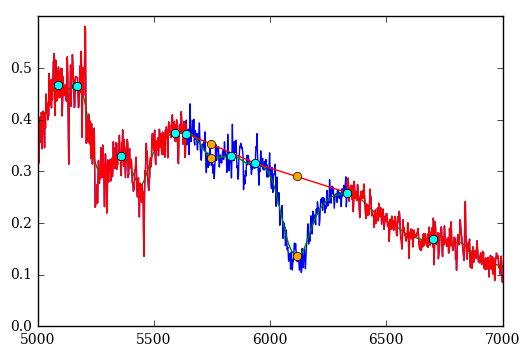

sn2005ag-20050212.596-br.flm 1.04651897756 0.167261274562 Check:  0.004 9.95077316601 10.0568173759
0.176203663148 24205.7436503


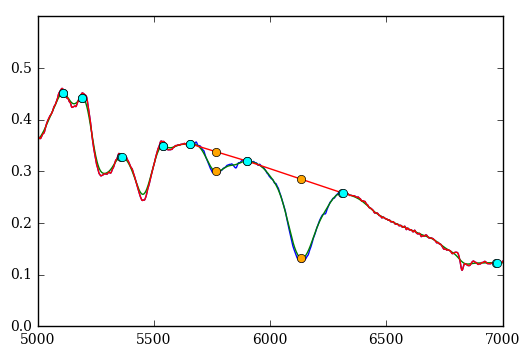

sn2005cf-20050610.7-uvot.flm 1.1 0.252245818206 Check:  0.003 38.7814633598 20.184419275
0.155378935711 5321.50569276


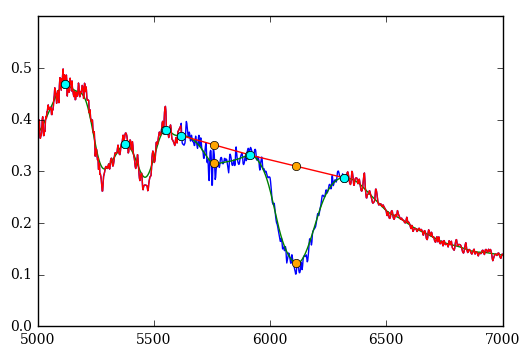

sn2005ms-20060106.400-ui.flm 1.02142208206 0.191442071692 Check:  0.004 17.0587091046 16.0601089496
0.120191295934 15727.9240574


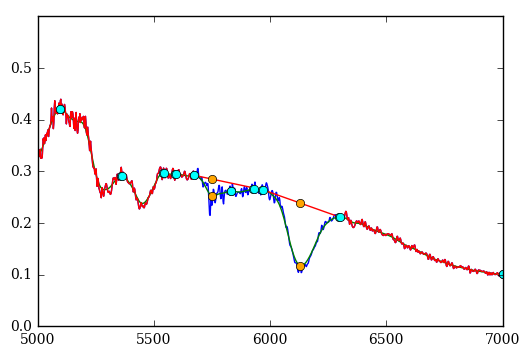

sn2005na-20060105.335-ui.flm 1.09 0.272893437067 Check:  0.003 23.9089174453 23.9644295065
0.158305618086 15274.6134058
Could not find maximum in a specified range!
sn2006or-20061201.530-ui.flm 1.06267601692 nan Check:  0.003 22.1273636649 19.6380646157
0.222052917905 392543.982202


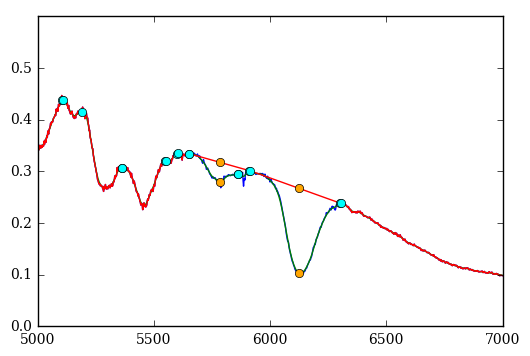

sn2007a-20070113.208-br.flm 0.95 0.235772430824 Check:  0.0015 93.1192082884 88.4635234241
0.141085945756 409323.294048


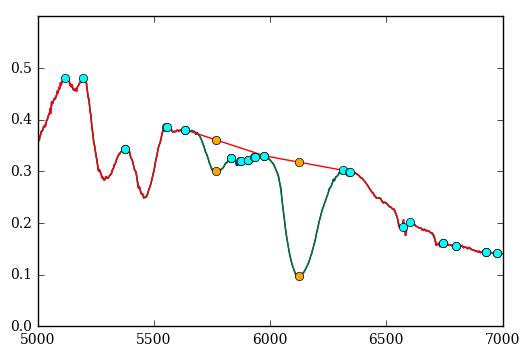

sn2007af-20070313.545-ui-corrected.flm 1.04 0.278588523084 Check:  0.001 115.813808468 109.415516387
0.157806101981 18742.808102


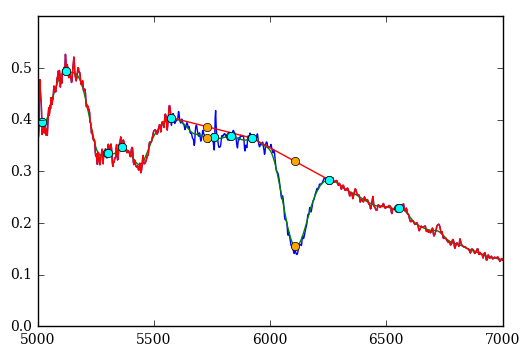

sn2007bz-20070426.419-ui.flm 1.05 0.13112715422 Check:  0.003 23.9661167489 23.6312175845
0.14761542516 120155.494472


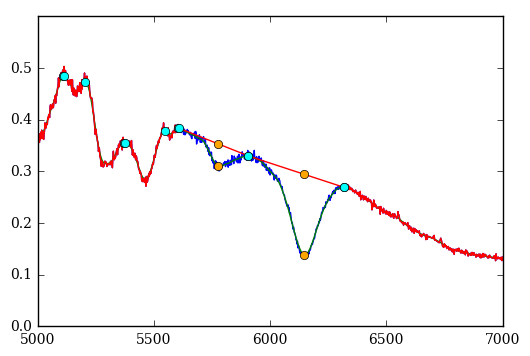

sn2007o-20070122.663-deimos.flm 1.13613975141 0.272816635553 Check:  0.002 48.1970926927 46.2065791613
0.360179821404 196883.050077


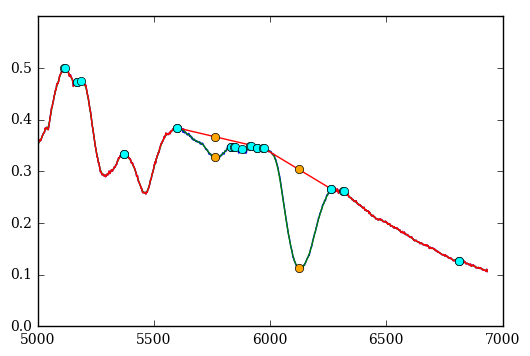

sn1994ae-19941201.50-fast.flm 0.96 0.210851792755 Check:  0.001 139.872295829 150.136503177
0.405703085287 172.864462365


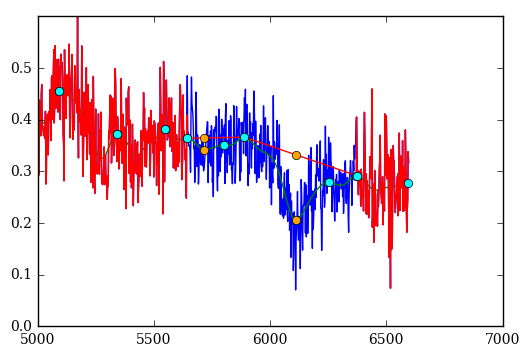

sn1996ab-19960522.37-fast.flm 1.01 0.180826946544 Check:  0.0045 4.98363684224 5.14521199227
0.360968684461 3772.32300884


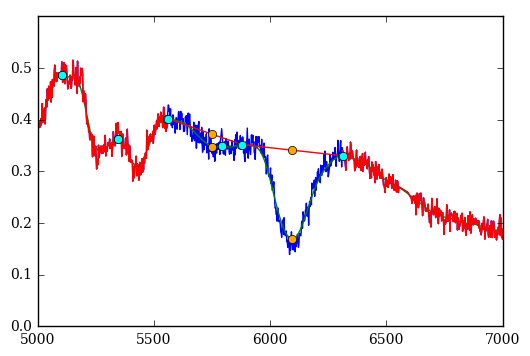

sn1996bl-19961018.18-fast.flm 1.07 0.138322567864 Check:  0.004 19.1778200471 19.5586070891
0.308716595122 44705.8048115


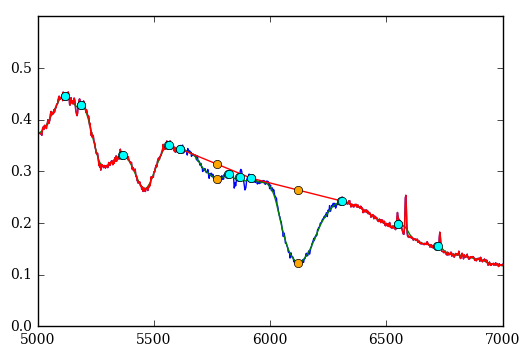

sn1997dt-19971204.11-fast.flm 1.04 0.205837973275 Check:  0.002 56.0487123013 56.96654751
0.321496679396 283478.3216


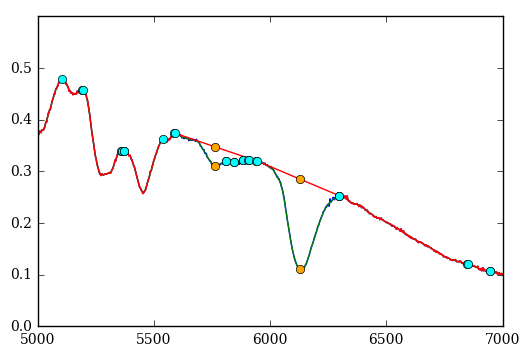

sn1998aq-19980429.26-fast.flm 1.11 0.212256748404 Check:  0.001 150.676935948 161.399514987
0.319501948532 229002.566534


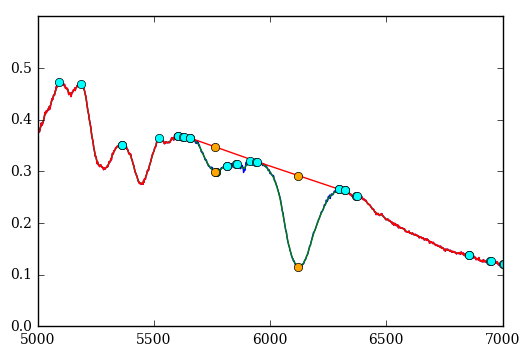

sn1998bu-19980517.15-fast.flm 1.03 0.277451446176 Check:  0.001 134.319674337 137.204085026
0.344592079042 6819.99814836


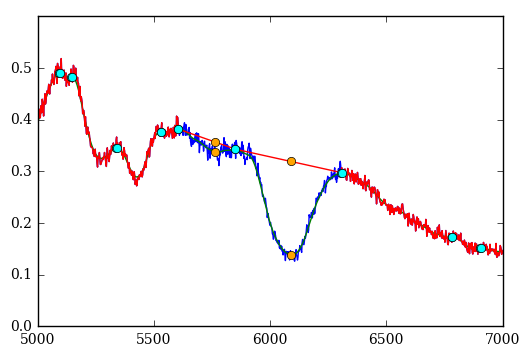

sn1998ec-19980930.50-fast.flm 1.08 0.104923823014 Check:  0.003 24.3551668949 25.4556344791
0.341998121065 9911.32904159


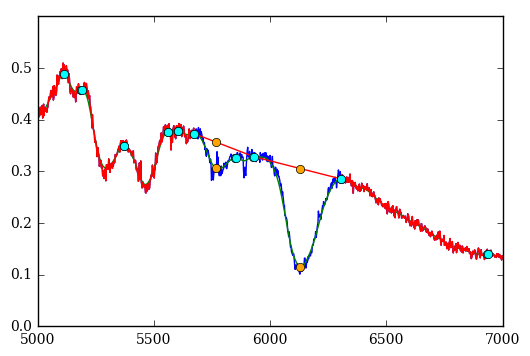

sn1998eg-19981024.15-fast.flm 1.14 0.259820986794 Check:  0.003 30.2624745063 32.3663049312
0.344955099143 10051.8266463


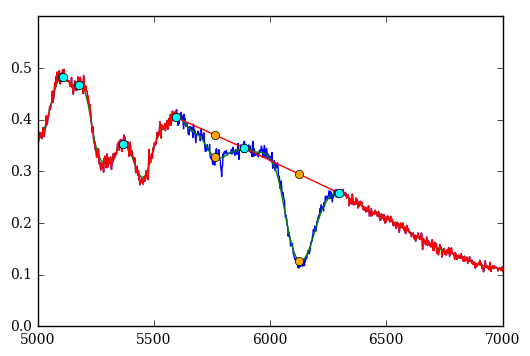

sn1998V-19980319.51-fast.flm 0.99 0.25078823716 Check:  0.003 29.3232071099 30.4884281143
0.319302447419 4133.14563051


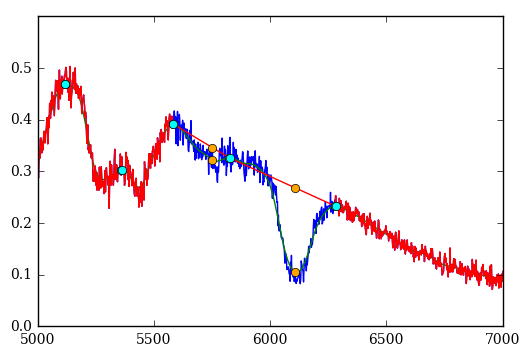

sn2000fa-20001215.36-fast.flm 1.0 0.145548757761 Check:  0.004 16.862359553 17.7996108846
0.390048276608 2823.01669549


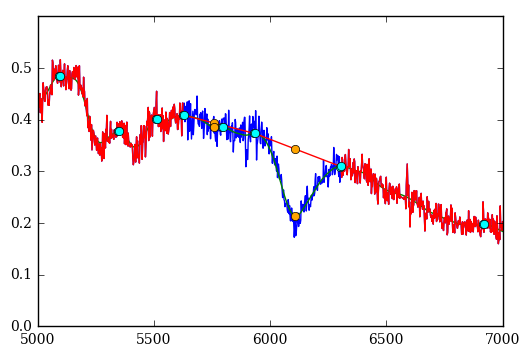

sn2001az-20010430.40-fast.flm 1.09 0.0681714487507 Check:  0.004 18.488048477 18.9991791822
0.377558653334 19893.4856981


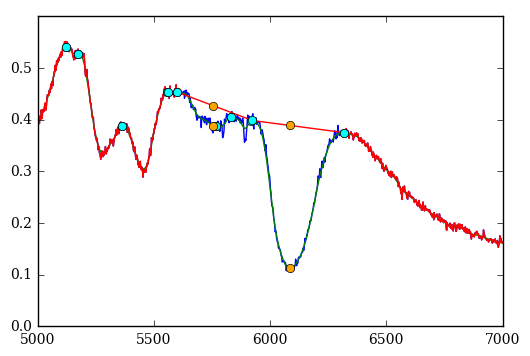

sn2001en-20011011.39-fast.flm 1.12 0.139401915446 Check:  0.002 45.9849268152 48.5119253032
0.34762868532 2032.74667446


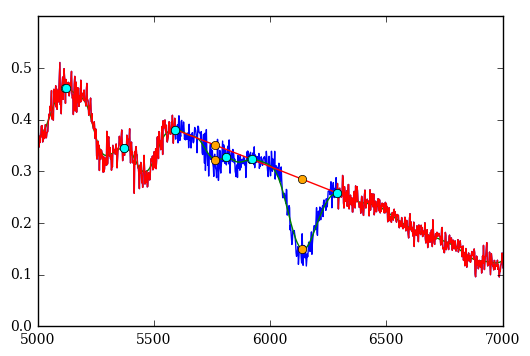

sn2002ck-20020502.46-fast.flm 1.08 0.210999995455 Check:  0.004 13.2806105152 14.0950318113
0.31684169654 363474.173058


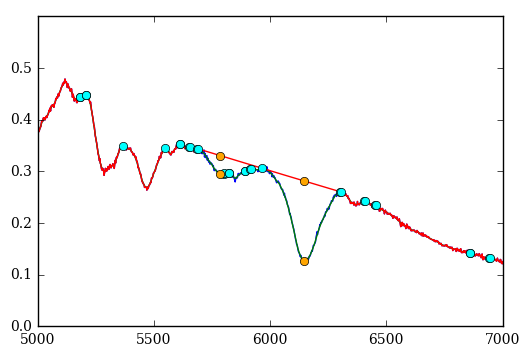

sn2002fk-20020929.44-fast.flm 1.13 0.2292210536 Check:  0.001 169.401776284 178.701687596
0.319295862738 1819.37294431


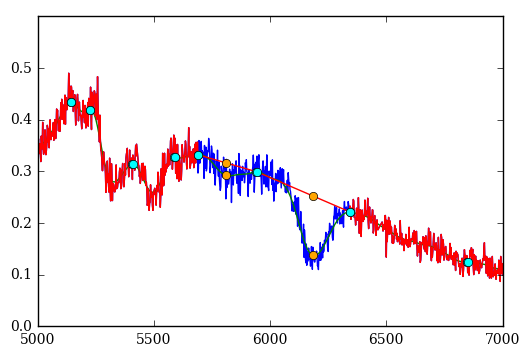

sn2002hu-20021113.25-fast.flm 1.05 0.209737010167 Check:  0.004 11.8674378183 12.5162474088
0.181041100538 481930.724133


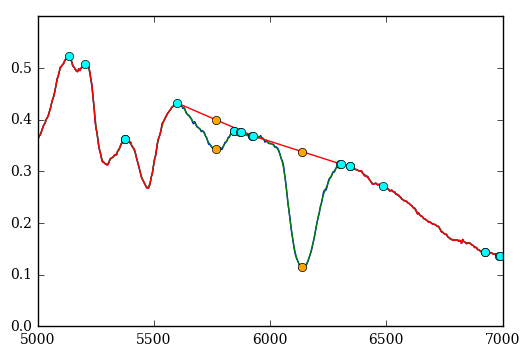

2003du_20030510_3203_10000_00.dat 1.07 0.255544286918 Check:  0.001 176.665517705 137.776154894
0.361423136545 13316.3982127


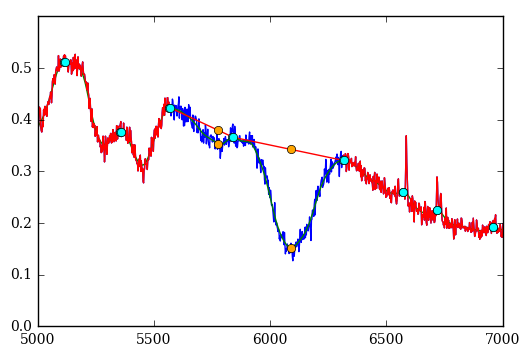

sn2003kc-20031203.49-fast.flm 1.14019986122 0.136397205758 Check:  0.003 38.971779777 40.1515779474
0.339587640006 4923.86415334


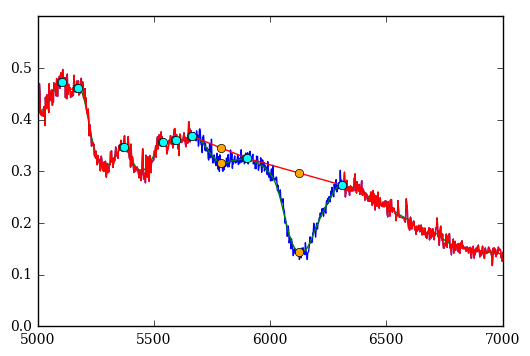

sn2004bg-20040411.39-fast.flm 1.05 0.193528789197 Check:  0.003 20.8073188444 22.1928311076
0.298674675552 2369.21735998


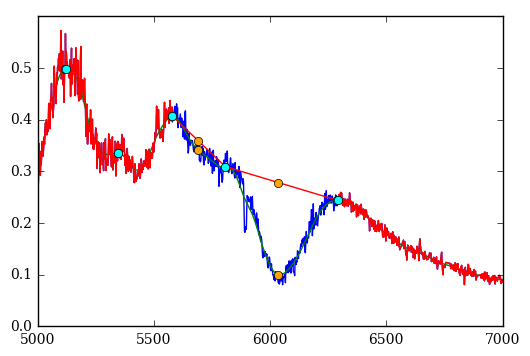

sn2005A-20050108.13-fast.flm 1.11 0.0996082704281 Check:  0.004 13.873247053 15.3296438272
0.189174351014 164929.015458


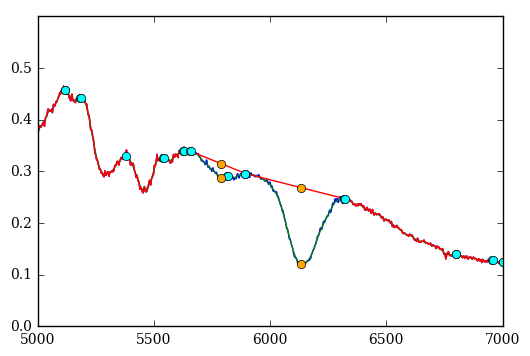

SN06ax_060330_b01_DUP_WF.dat 1.06 0.189112462352 Check:  0.0015 76.0047951682 75.0073923178
0.396869244886 4314.77773882


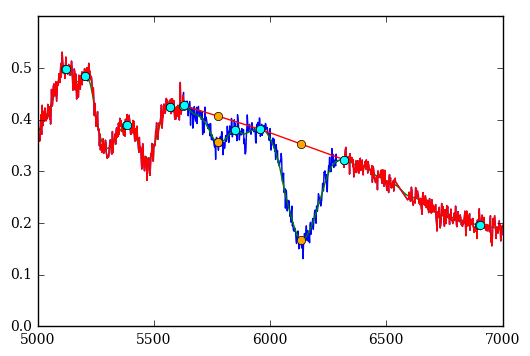

sn2006cf-20060519.25-fast.flm 1.08357495977 0.274748684506 Check:  0.003 24.1423888736 25.8361907292
0.381145735443 749.081376041


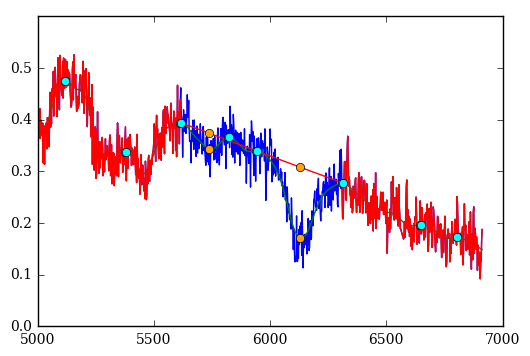

sn2007ae-20070225.54-fast.flm 0.98 0.222760848864 Check:  0.004 9.26962571067 9.7520371359
0.339667934013 12243.829405


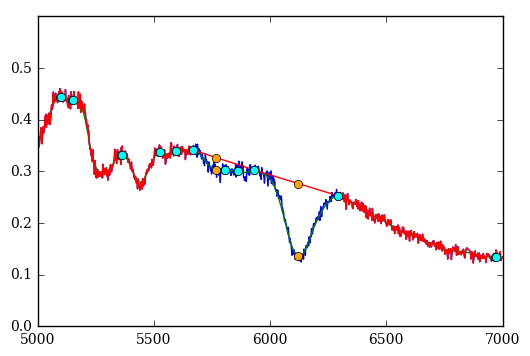

sn2007F-20070121.55-fast.flm 0.96 0.171707022454 Check:  0.003 32.6623867105 34.5212613972
0.100492024898 35526.4758667


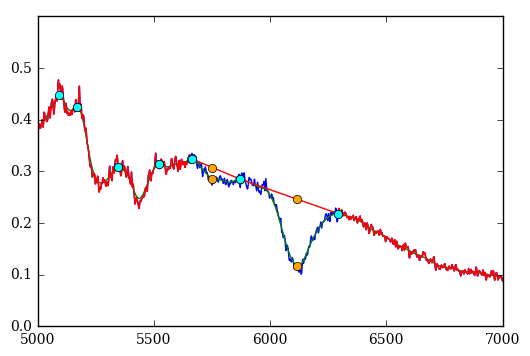

SN08bf_080328_g01_NTT_EM.dat 1.05 0.169513636257 Check:  0.003 20.5079637331 20.3785200773
0.232494397977 11247.8897807


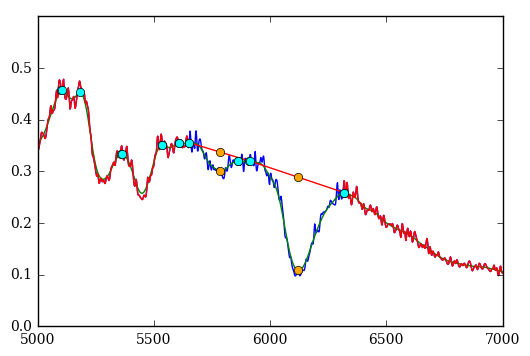

SN04ey_041025_b01_CLA_LD.dat 1.00821961936 0.204309651065 Check:  0.003 21.4148355064 23.7522435175
0.211591685188 40372.7116636


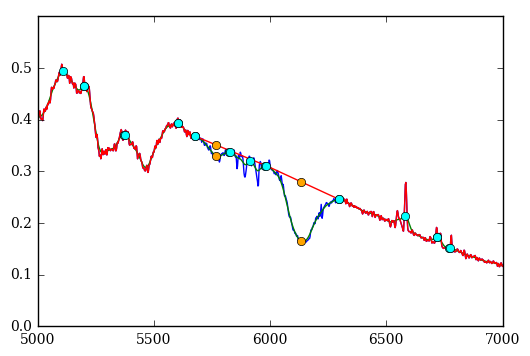

SN05bg_050412_b01_DUP_WF.dat 1.06633511992 0.19234566667 Check:  0.002 42.0940169494 38.7947571552
0.324038137678 8193.28191921


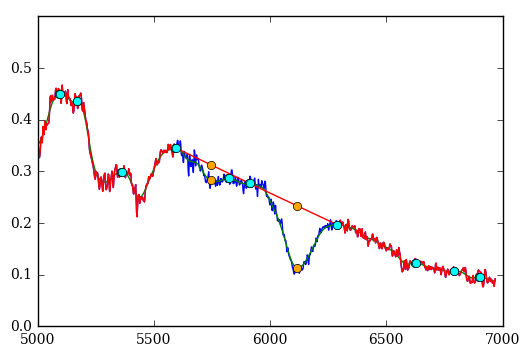

SN05hc_051024_b01_MGH_BC.dat 1.03 0.25219265016 Check:  0.003 25.8828957246 26.1895104645
0.422394183444 1518.96291231


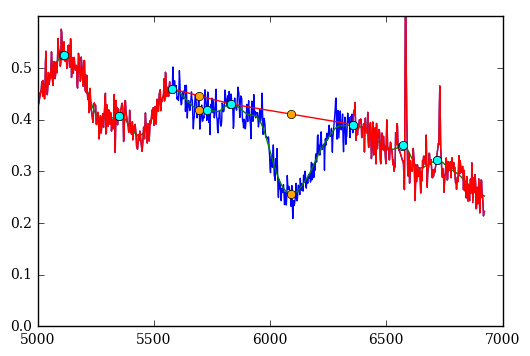

SN05ku_051125_b01_DUP_MS.dat 1.03987320294 0.172833769208 Check:  0.004 15.9890428723 16.998579527
0.313673820813 5989.85694142


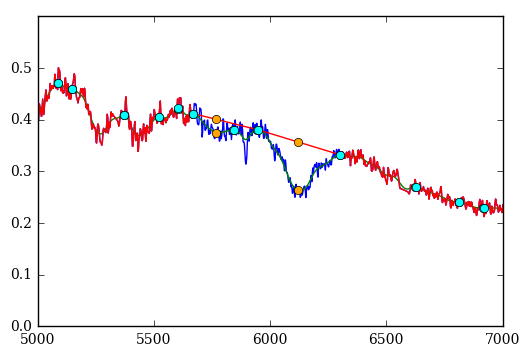

SN06hx_061010_b01_DUP_WF.dat 1.05273249926 0.275344083599 Check:  0.003 23.6878682483 25.9064594346
0.18355768283 6663.73575343


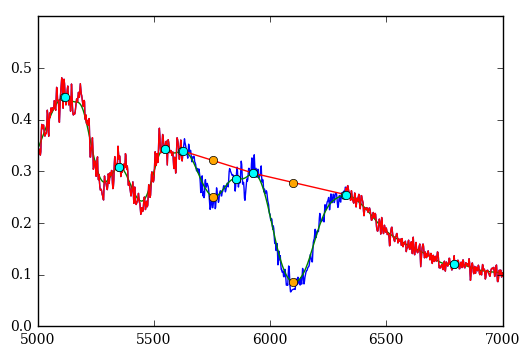

SN06os_061122_b01_DUP_WF.dat 1.07098749844 0.361790621804 Check:  0.004 12.8536902003 13.4035978951
0.212188304038 29669.3037095


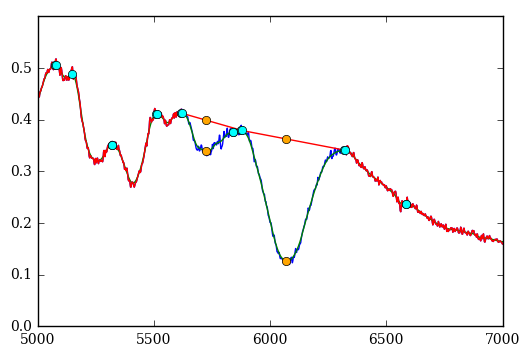

SN07as_070319_b01_DUP_BC.dat 1.11396538206 0.257353759595 Check:  0.002 41.8714709651 45.1748178915
0.206856700108 38385.0857451


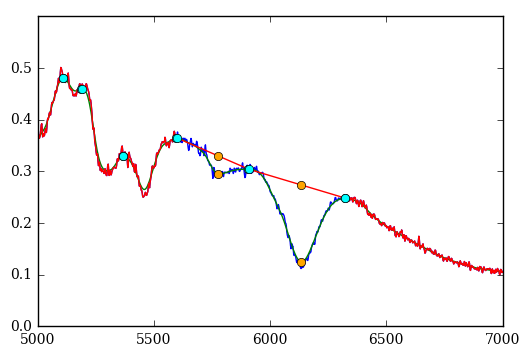

SN08bq_080407_b01_DUP_WF.dat 1.00130644601 0.232720775053 Check:  0.003 35.3880739351 37.4970528421
0.19728917072 433121.693452


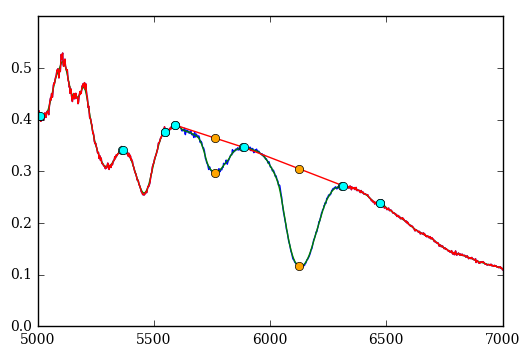

SN08hv_081218_b02_CLA_LD.dat 1.13369017264 0.356013114787 Check:  0.0015 85.6875728838 82.3632762909
0.134137111226 34.7393820093
Could not find maximum in a specified range!
sn1980n-19801211.724-iue.flm 1.13157052606 nan Check:  0.0045 1.70828874926 1.22286925385
0.181663636418 69.7506424617
Could not find maximum in a specified range!
sn1981b-19810311.597-iue.flm 1.05664955847 nan Check:  0.0045 1.69254070137 1.61788881452
0.46264942029 27145.3262015
Could not find maximum in a specified range!
sn2001ba-20010508.791-hst.flm 1.03352873666 nan Check:  0.0015 84.013145238 80.7913883177
0.134202824503 505313.698249


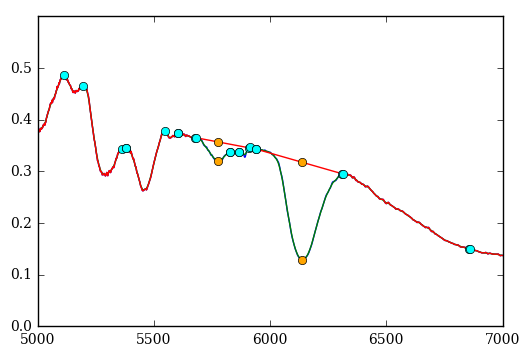

sn2011by-hst+lick.flm 1.14 0.193402344365 Check:  0.001 145.160507764 131.019382914
0.149799097362 609771.184257


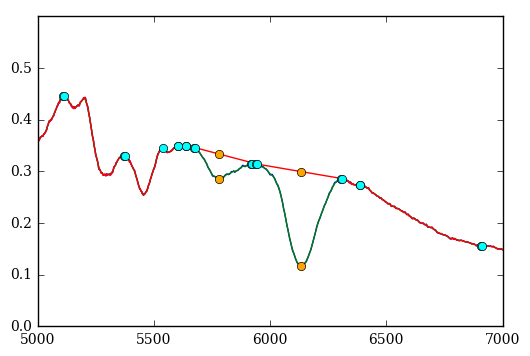

sn2011fe-visit4-hst.flm 1.1 0.258727352692 Check:  0.001 157.758697355 154.828176932
2
0.111611405935 221779.36349


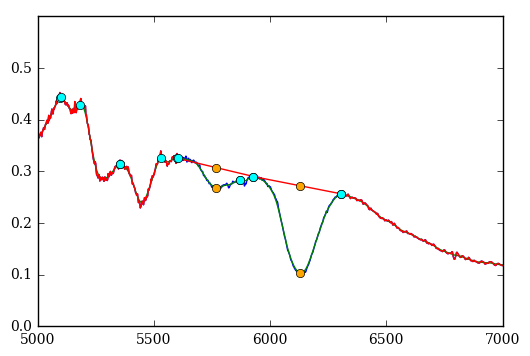

sn1995e-19950224-uoi2.flm 1.16 0.231198384223 Check:  0.002 57.1703862234 54.3574723707
0.192853686123 57986.1004748


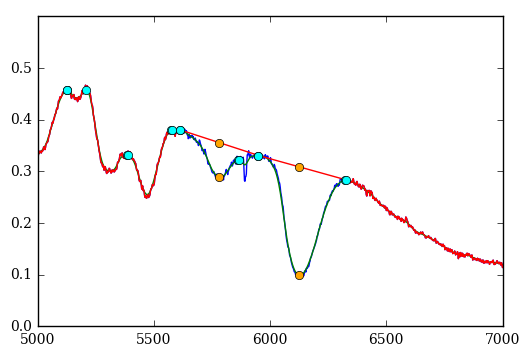

sn1997y-19970209-uohp.flm 1.15 0.319355831107 Check:  0.002 53.4636542865 48.8902404513
0.127990597897 635687.18302


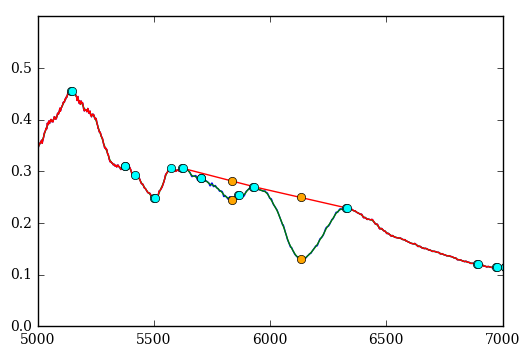

sn1999ac-19990312-ui-corrected.flm 1.23 0.302344169024 Check:  0.001 120.655521224 108.311328395
0.12719952389 499261.842976


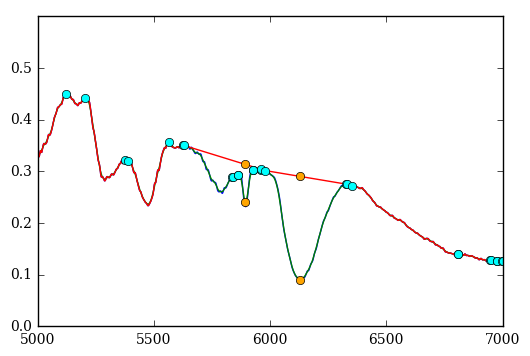

sn1999gd-19991205-uvoir.flm 1.18 0.364367701694 Check:  0.001 111.188307052 104.103767424
0.160332818911 132889.234287


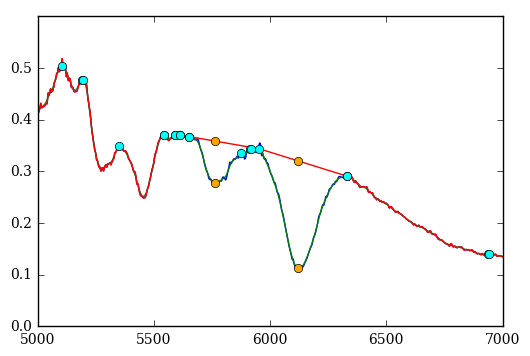

sn2002ha-20021102-ui-corrected.flm 1.22 0.389699845028 Check:  0.0015 75.936259872 68.7016172578
0.166241763436 6070.70443318


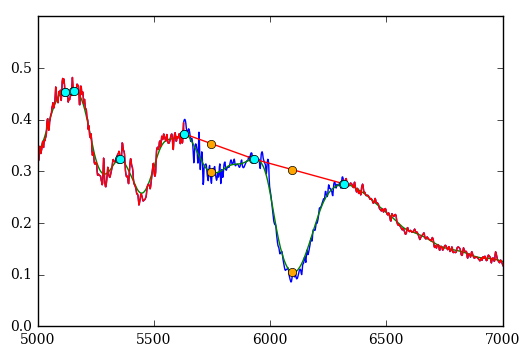

sn2003cq-20030408-ui.flm 1.2 0.27823315684 Check:  0.004 18.3634127947 16.3791643361
0.080526423842 130.974163662


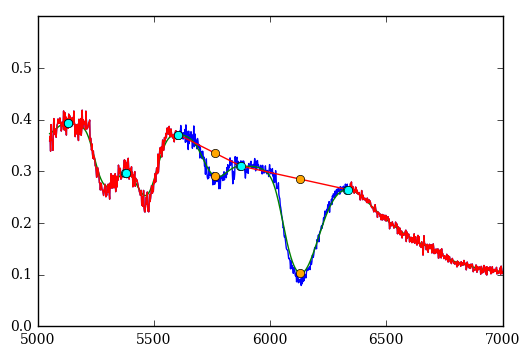

sn2005w-20050211.200-br.flm 1.22957865079 0.24634790455 Check:  0.0045 1.30140313403 0.954451152042
0.164677394291 58668.7385589


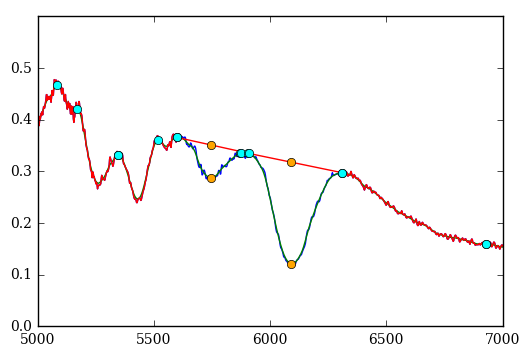

sn2006sr-20061220.097-ui.flm 1.24 0.325310870484 Check:  0.002 43.7174787146 40.9415266865
0.122918042142 74463.4604443


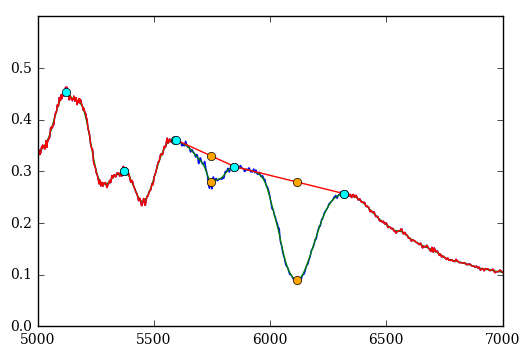

sn2007co-20070614.468-ui-corrected.flm 1.16 0.264305034843 Check:  0.002 45.9716688301 42.830129588
0.308384340223 43773.3850402


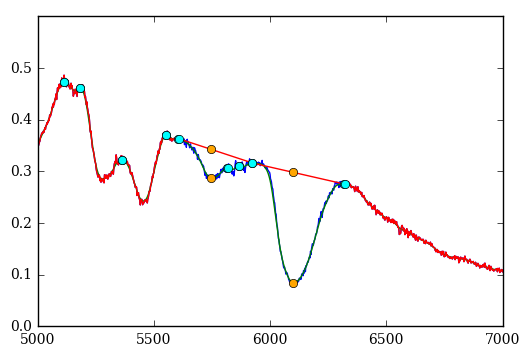

sn1998dh-19980804.36-fast.flm 1.17 0.257710537183 Check:  0.002 55.6127571283 58.7863076969
0.289287928179 78841.4665759


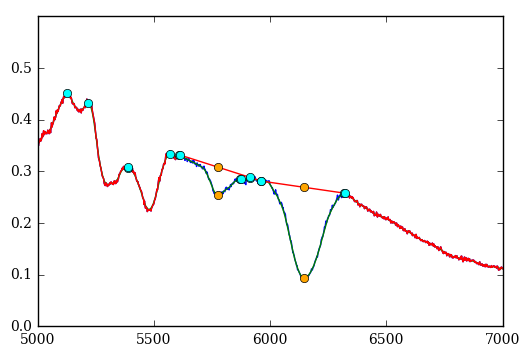

sn2002cr-20020515.28-fast.flm 1.19 0.309013073844 Check:  0.0015 72.8362758129 77.4070510996
0.313509808614 12068.4300967


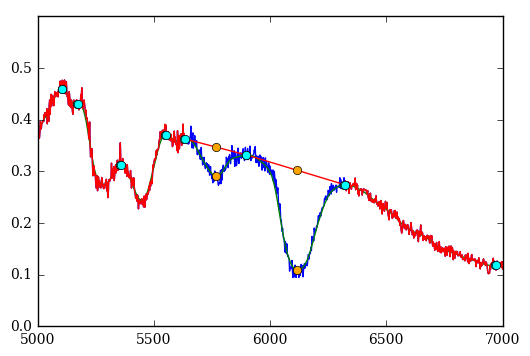

sn2002kf-20021231.34-fast.flm 1.2 0.29449347988 Check:  0.003 30.0361866302 31.9496419766
0.312784374366 9748.32391088


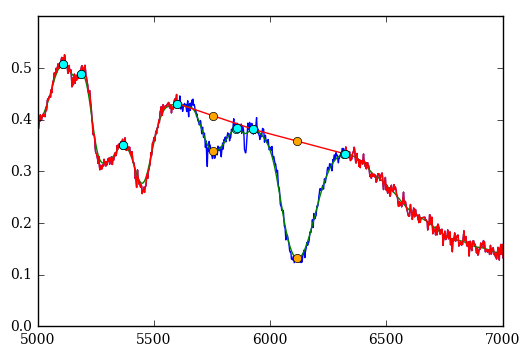

sn2003ch-20030329.11-mmt.flm 1.22 0.30275381575 Check:  0.003 28.142821495 27.4768924986
0.227710571653 3850.64369825


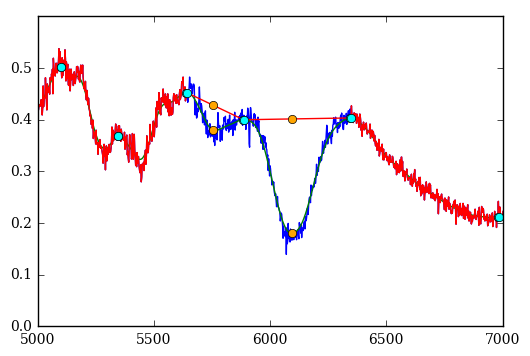

SN07jg_070922_b01_CLA_LD.dat 1.17 0.218861741868 Check:  0.004 17.0687196418 18.4667264992
0.312312783837 36001.5065228


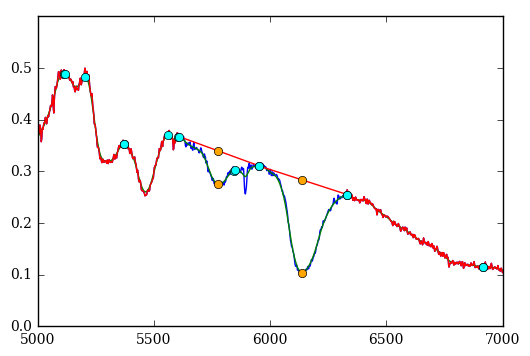

SN05kc_051125_b01_DUP_MS.dat 1.24 0.35750583678 Check:  0.002 51.8250596461 53.3221695027
0.160813018967 265993.384196


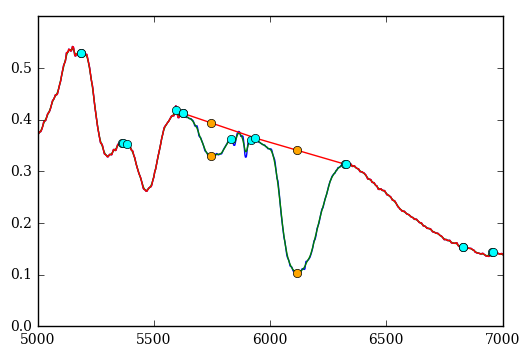

2002er_20020910_3209_9997_00.dat 1.23 0.270831432008 Check:  0.001 139.288769923 133.550781904
3
0.136728049886 264639.339217


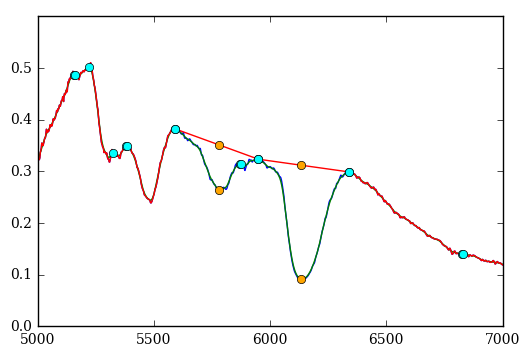

sn2001ep-20011020-ui-corrected.flm 1.3 0.392691985921 Check:  0.0015 81.4233736509 78.8007154147
0.21549254547 12277.9907106


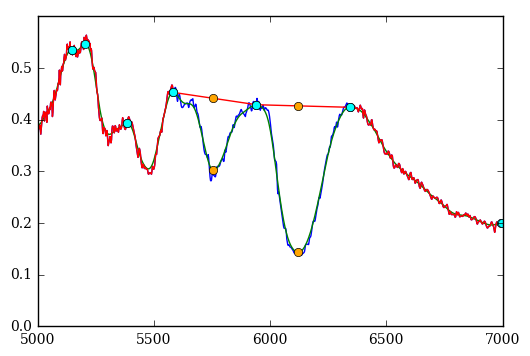

sn2004gs-20041217.447-ui-corrected.flm 1.41 0.492453562738 Check:  0.003 30.1756646281 26.4614100581
0.252640262032 194689.903524


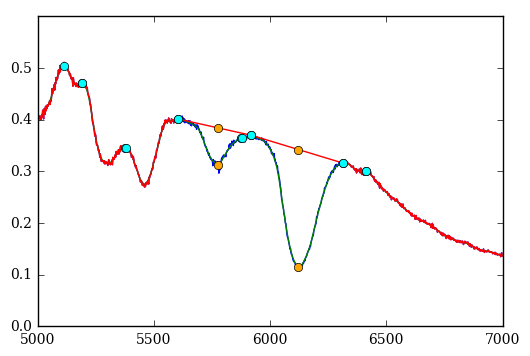

sn2005ki-20051202.649-deimos.flm 1.41 0.316652578696 Check:  0.0015 87.6229771159 86.6041247724
0.109995137934 35142.5261749


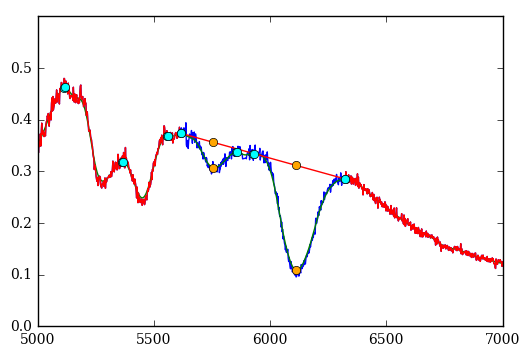

sn2005lz-20060101.381-deimos.flm 1.34 0.241358183964 Check:  0.003 25.7864018708 25.0623713149
0.128034983896 442459.096248


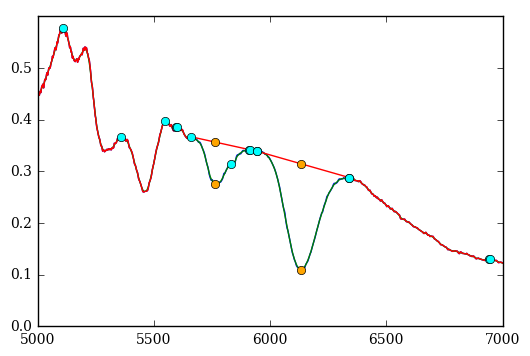

sn2006d-20060124.435-ui.flm 1.35 0.396484763487 Check:  0.001 113.25651542 109.17758021
0.168306701302 142242.323927


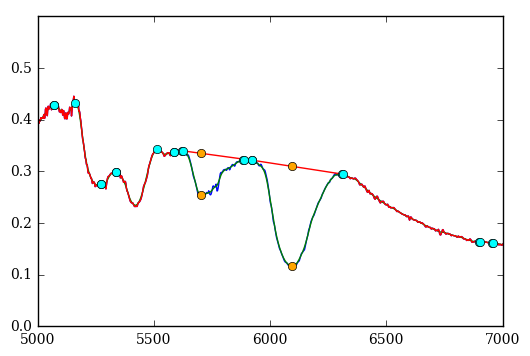

sn2006ej-20060824.430-ui.flm 1.26659174257 0.420632327115 Check:  0.0015 70.7104988599 64.7744839498
0.0716907800285 271817.42527


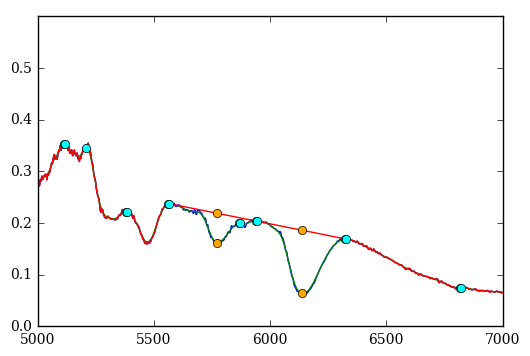

sn2007bc-20070410.323-ui-corrected.flm 1.37 0.464700448438 Check:  0.002 49.644834977 46.7404930151
0.247199468807 133675.310079


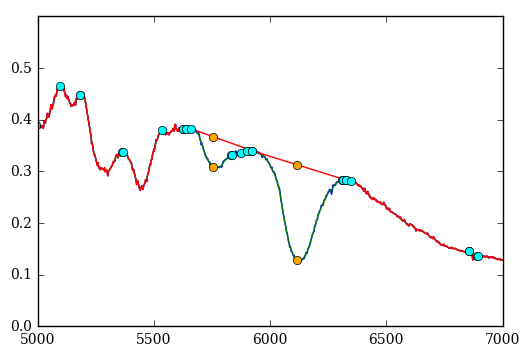

1994D_19940319_3402_9132_00.dat 1.37 0.318016988673 Check:  0.001 101.093824808 108.011111518
0.404086541252 2238.74715247


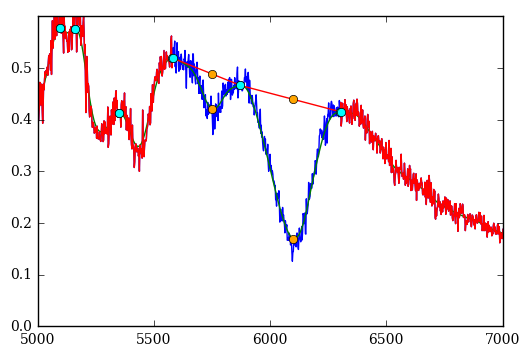

sn1994M-19940504.15-fast.flm 1.26 0.250321564516 Check:  0.004 13.9958814232 13.8634591514
0.125514168694 1184193.30821


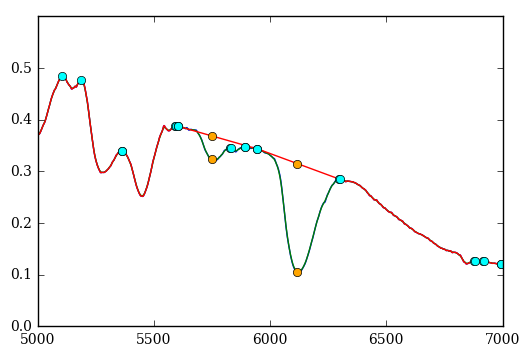

1996X_19960419_3077_10669_00.dat 1.26 0.217467636586 Check:  0.001 207.036128657 162.07865659
0.33831551709 1108.91500706


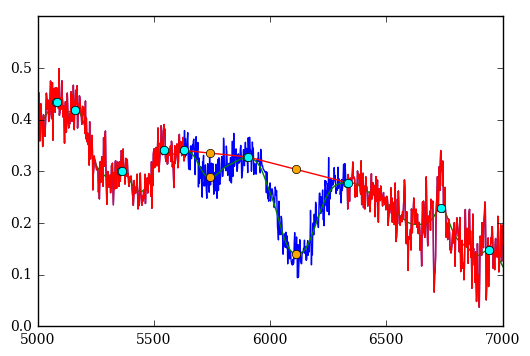

sn1998dx-19980914.18-fast.flm 1.32 0.286070071535 Check:  0.004 10.5421236452 10.9950820118
0.394278691309 8831.38927491


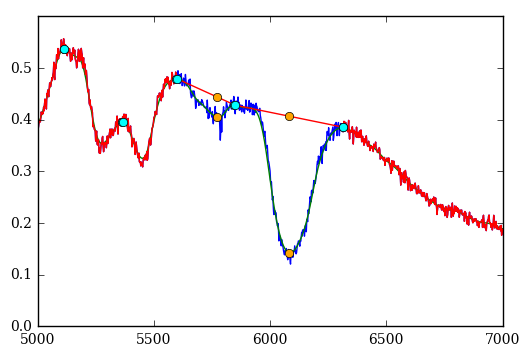

sn1998ef-19981029.31-fast.flm 1.27 0.148701099789 Check:  0.003 33.0091476762 34.6307150194
0.346787643164 4702.37668133


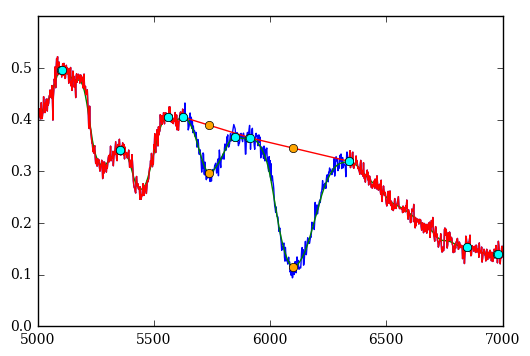

sn1999cc-19990516.34-fast.flm 1.35 0.398345546622 Check:  0.003 21.7701503521 23.2200876346
0.342664315057 1658.63299751


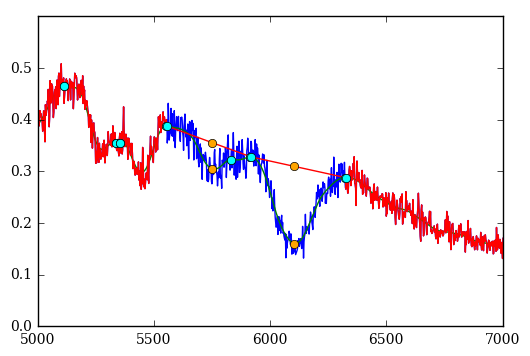

sn2002G-20020122.52-fast.flm 1.25 0.337930134024 Check:  0.004 12.0740330417 12.2289718425
0.18415619229 31784.9602686


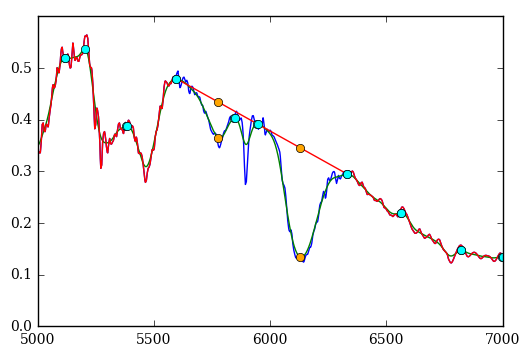

2003cg_20030401_3650_9347_00.dat 1.26 0.326642191264 Check:  0.003 26.7599927136 24.9222303011
0.368655240459 1106.10894026


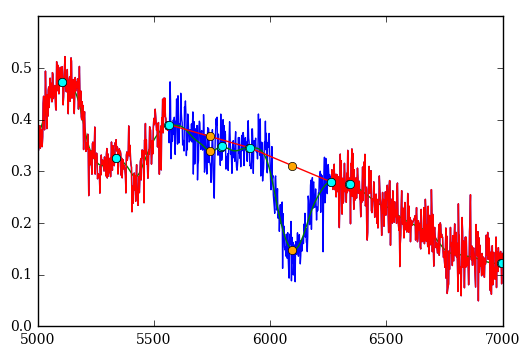

sn2003ic-20030921.36-fast.flm 1.30686535341 0.179247758245 Check:  0.004 11.407827594 11.8898809655
0.354488696813 23593.1326017


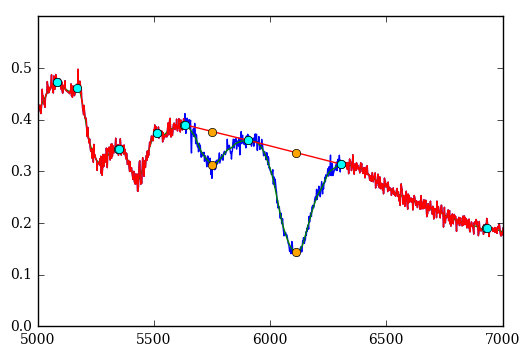

sn2003it-20031020.23-fast.flm 1.36 0.338379642541 Check:  0.002 48.6239163495 50.6148539568
0.271119934954 4362.81988505


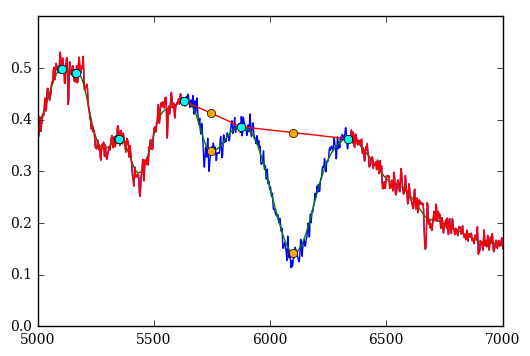

SN04ef_040914_b01_DUP_WF.dat 1.39 0.312321156164 Check:  0.004 17.3943925751 16.5464364119
0.315619910101 8096.72416512


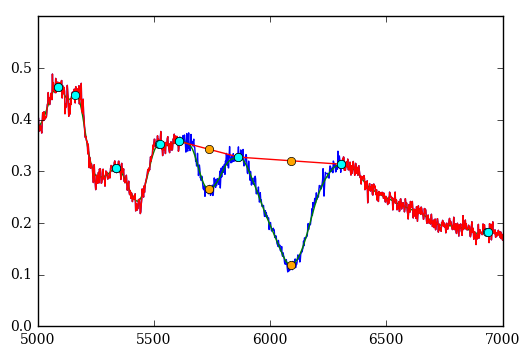

sn2005am-20050303.30-fast.flm 1.3 0.386512346219 Check:  0.003 27.1100082303 28.0974830128
0.206378533311 20820.0969713


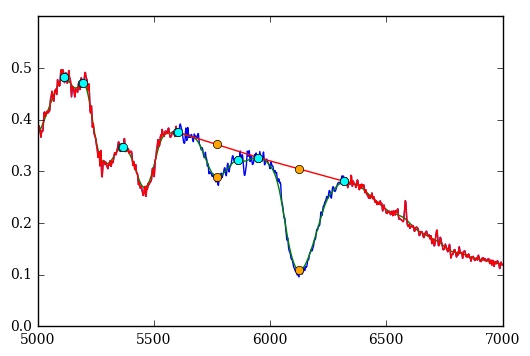

SN05bo_050418_b01_DUP_WF.dat 1.28 0.324506868044 Check:  0.003 28.2051121583 28.9716440857
0.382094346452 4246.61587595


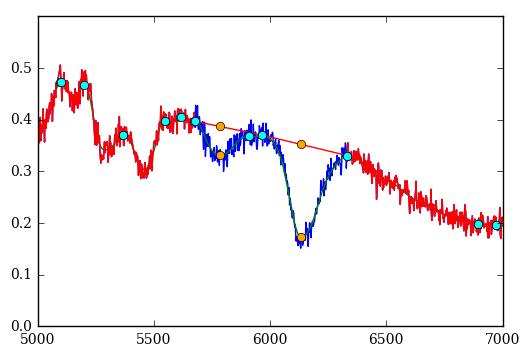

sn2006az-20060331.37-fast.flm 1.29 0.312500343476 Check:  0.003 23.4825642844 24.2229269357
0.232817553251 24281.0125532


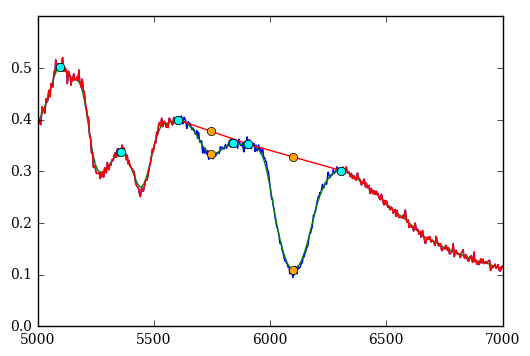

SN07bd_070417_b01_DUP_WF.dat 1.3 0.206013200203 Check:  0.003 33.3791043559 33.3833994931
0.339114595503 4429.63795663


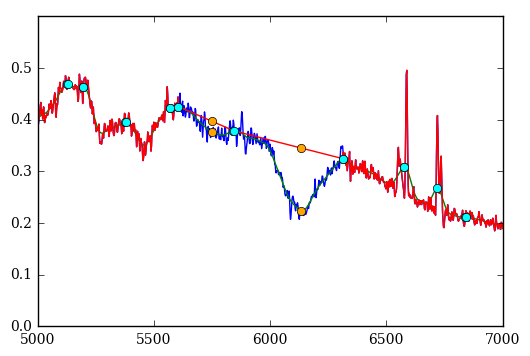

SN06fw_060927_b01_DUP_WF.dat 1.28774437183 0.168660689336 Check:  0.003 20.9677941077 18.788086689
0.153874163137 570.279212216
Could not find maximum in a specified range!
sn1992a-19920121.574-iue.flm 1.39953907584 nan Check:  0.004 5.51237057019 2.86022173774
4
0.174012240726 97044.4809573


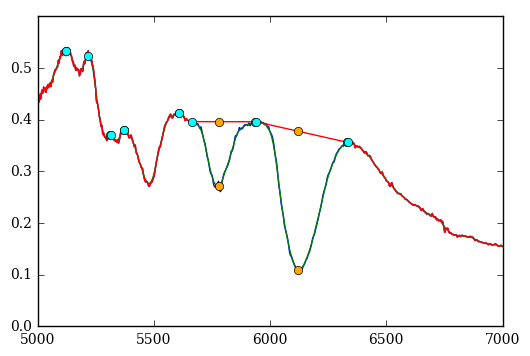

sn2000dk-20000926-ui-corrected.flm 1.62 0.461587616301 Check:  0.0015 67.3795955254 60.7007922387
0.315157334522 190444.851595


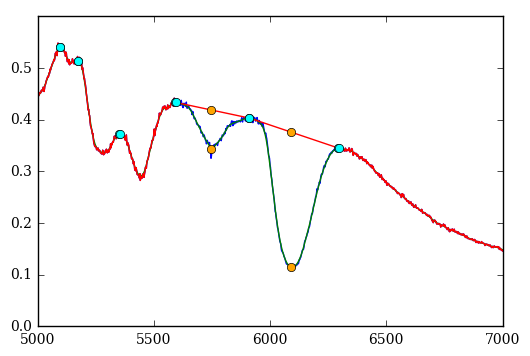

sn2002he-20021108-br.flm 1.44 0.285496662644 Check:  0.0015 96.6428616639 95.6520965706
0.20368990768 12658.1121251


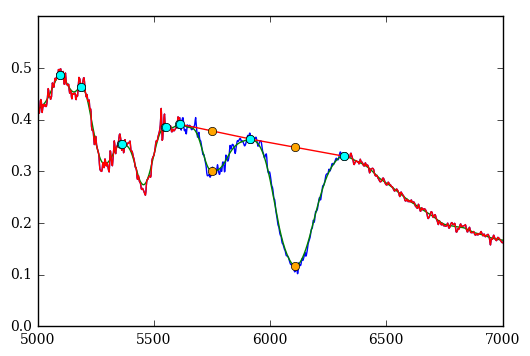

sn2003U-20030204-ui.flm 1.46 0.339060438689 Check:  0.003 31.0706940397 30.1795934023
0.249655252921 1376.15774078


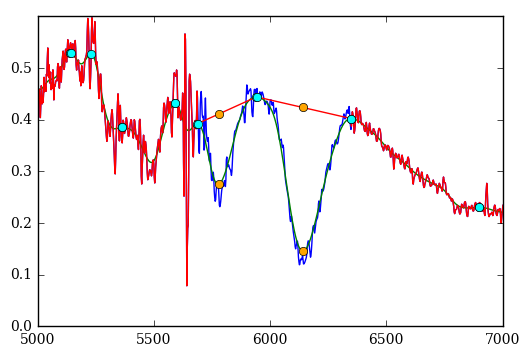

sn2006gt-20060925.348-ui.flm 1.66 0.489594822785 Check:  0.004 13.3227074084 12.2922114364
0.146940371277 126656.250788


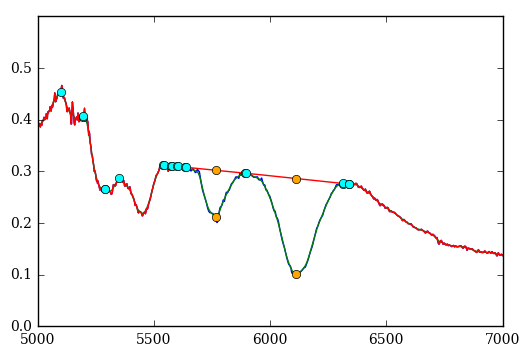

sn2006kf-20061030.385-ui.flm 1.55 0.490525034771 Check:  0.0015 60.6845217547 58.4890854823
0.177316929909 34990.4035571


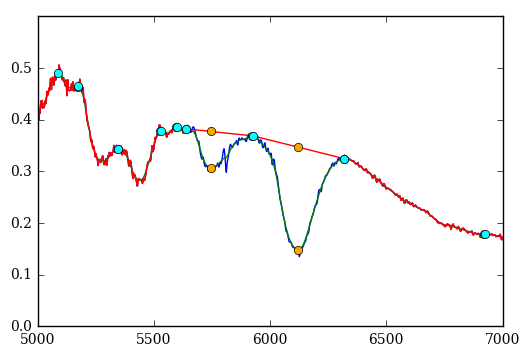

sn2006n-20060123.286-ui.flm 1.5 0.350847770712 Check:  0.002 43.6620758539 39.9495937413
0.146065841304 55125.1261512


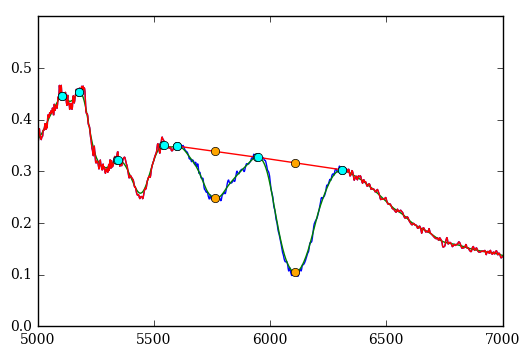

sn2007ci-20070524.264-ui-corrected.flm 1.6 0.425235722404 Check:  0.003 38.414619143 38.8321825778
0.282252918768 747870.27639


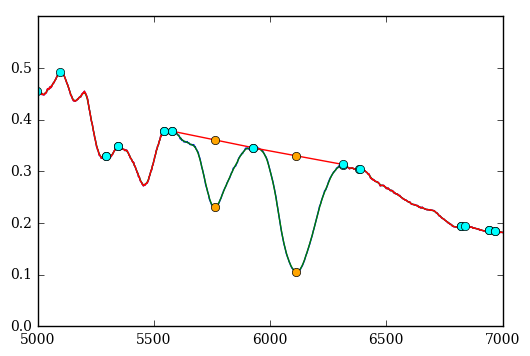

sn2007on-20071112.468-br.flm 1.64106422829 0.579037407011 Check:  0.001 231.60698374 236.523915492
0.347050026971 146.712333044


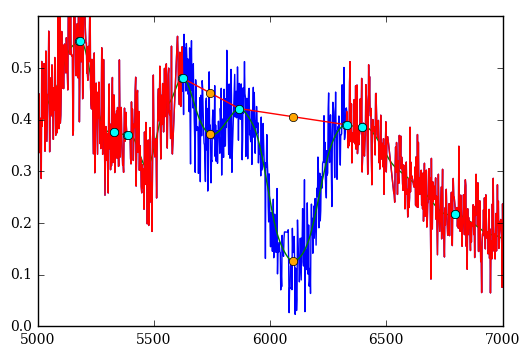

sn1994T-19940612.19-fast.flm 1.51 0.287114365106 Check:  0.0045 3.7330803909 3.67379617008
0.373330087054 14350.4046469


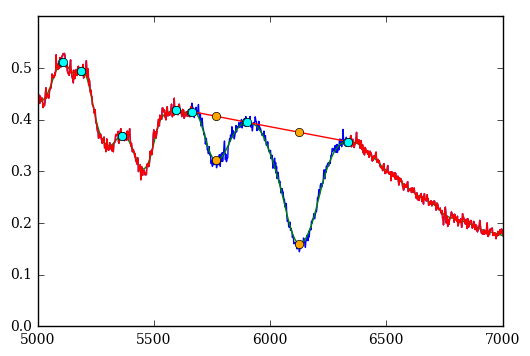

sn1999ej-19991030.28-fast.flm 1.48 0.397219223918 Check:  0.003 39.406420162 41.0765720322
0.429180945432 14132.1357864


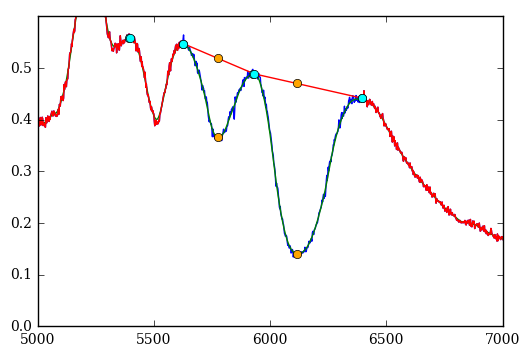

sn1999gh-19991206.53-fast.flm 1.69 0.463855664593 Check:  0.002 44.4293056661 46.1960647511
0.426983453621 6251.79571686


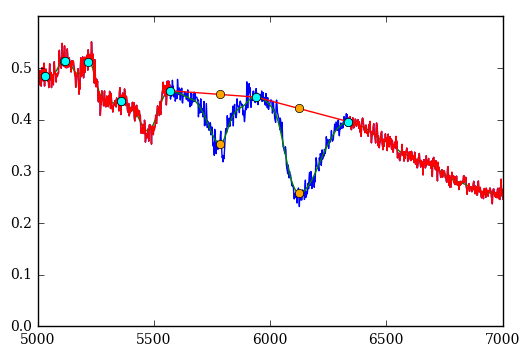

sn2002do-20020619.43-fast.flm 1.56 0.58134130716 Check:  0.003 28.6786772734 30.1768146952
0.338891257757 1489.90368875


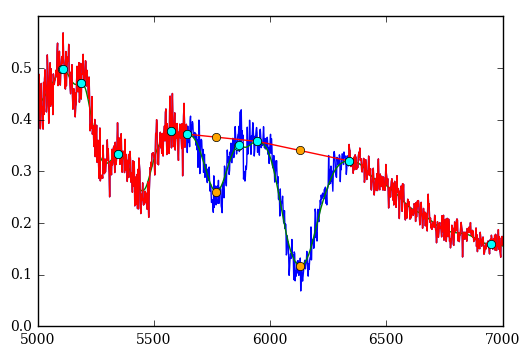

sn2002hw-20021114.10-fast.flm 1.44 0.471593533001 Check:  0.004 11.1342145953 11.3784076669
0.339542920921 1602.55702418


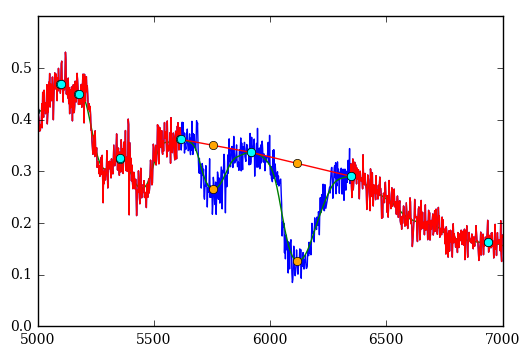

sn2003iv-20031019.38-fast.flm 1.65 0.452625943761 Check:  0.004 12.6584323707 13.0813617685
0.453425380732 3222.38230399


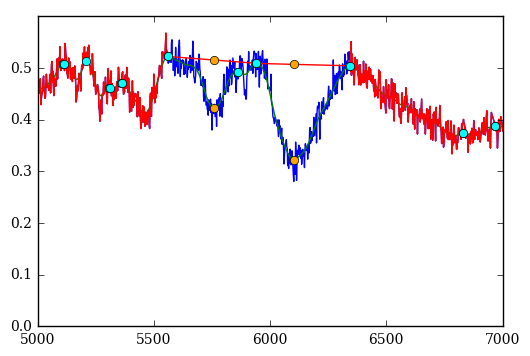

sn2005mc-20051227.37-fast.flm 1.63 0.505052415988 Check:  0.003 23.4773007174 25.5399137299
0.417217314689 2514.01822923


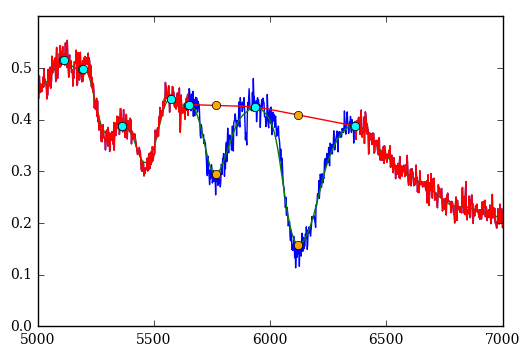

sn2006gj-20060920.43-fast.flm 1.48 0.526620819787 Check:  0.004 18.2542200529 19.2326318017
0.425166216786 1325.69150389


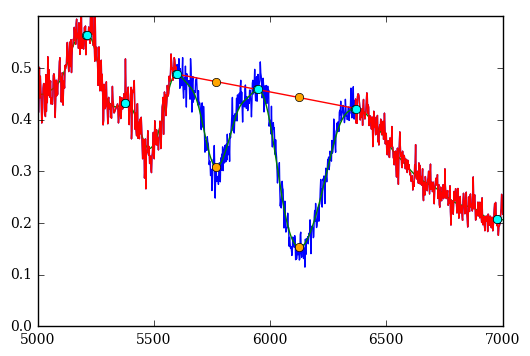

sn2007au-20070326.15-fast.flm 1.69 0.569285929691 Check:  0.004 14.4551062878 14.5619679101
5
0.262073293063 18985.8372479


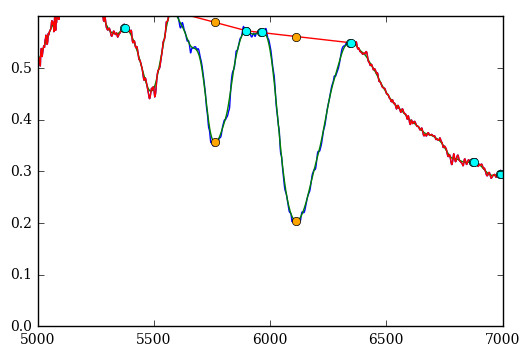

sn1999da-19990709-ui.flm 1.9 0.650029926262 Check:  0.002 44.8777259588 37.6739808022
0.270445172027 1393.5060088


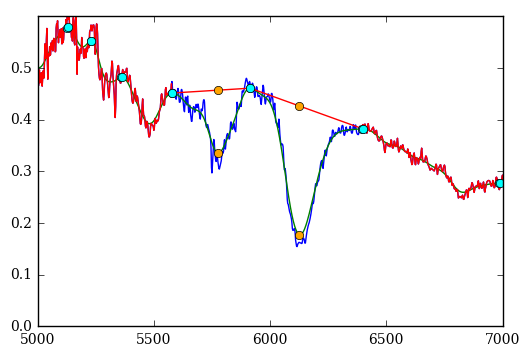

sn2006cs-20060605.335-ui.flm 1.9352579802 0.488493414387 Check:  0.004 16.488131718 10.5900759504
0.271916011018 55989.3503598


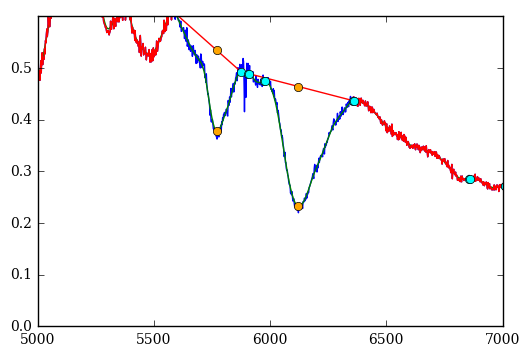

sn2007n-20070122.583-deimos.flm 1.874690474 0.679789155237 Check:  0.002 53.5508032379 54.7855706783
0.412561753745 5653.71501827


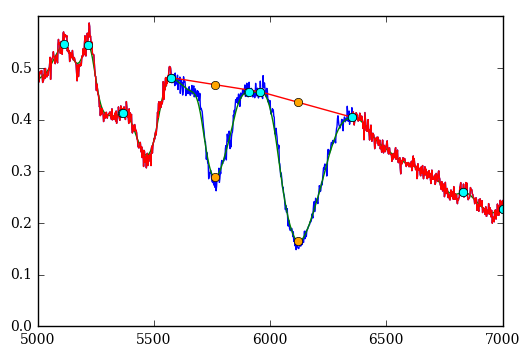

sn1998bp-19980430.47-fast.flm 1.79 0.667953612019 Check:  0.003 27.8093560716 28.741800308
0.487247487159 1009.78220027


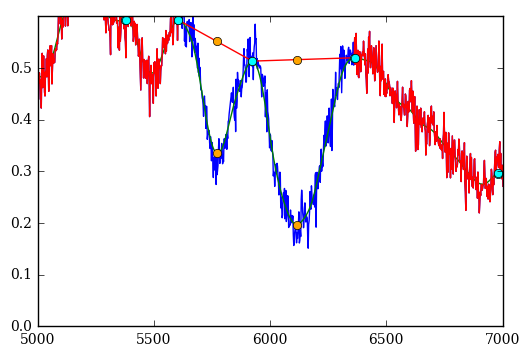

sn1998de-19980730.46-fast.flm 1.88 0.679030360418 Check:  0.004 13.4062477817 13.7655395418
0.319482498394 58877.4356896


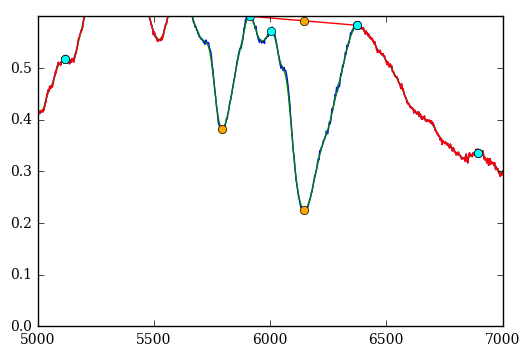

sn1999by-19990514.15-fast.flm 1.97 0.680634140558 Check:  0.0015 97.9157571889 96.6980224478
0.395057336308 788.16259038


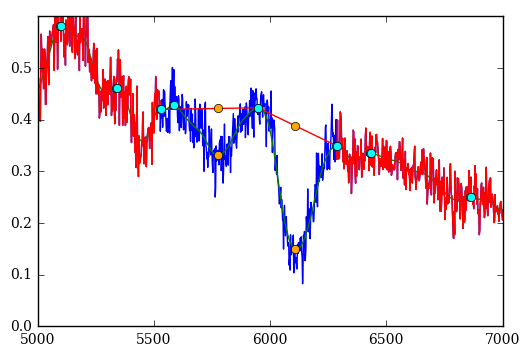

sn2002fb-20020907.51-fast.flm 1.77 0.378369924641 Check:  0.004 8.6958833589 8.90225730385
0.463776071543 23153.0945963


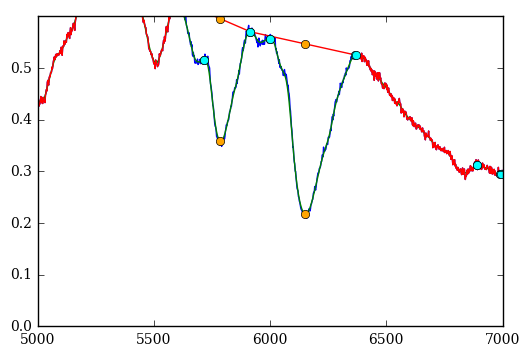

sn2005ke-20051125.30-fast.flm 1.82 0.719501414781 Check:  0.0015 70.8780328674 77.1936763643
0.481904376676 1827.63289089


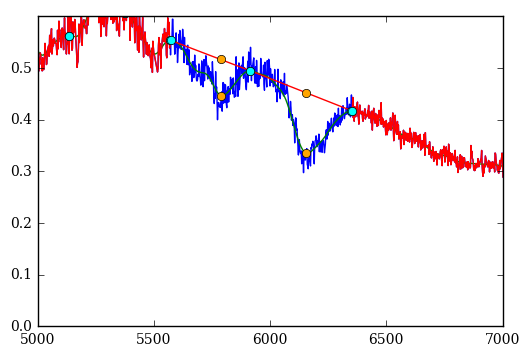

sn2007al-20070312.31-fast.flm 1.89 0.599808270196 Check:  0.004 19.958673159 22.287016872
0.236792529818 5009.96476602


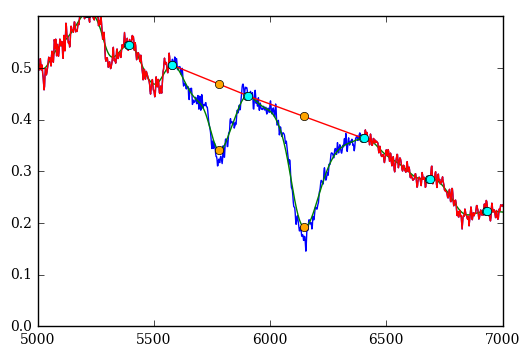

SN07ax_070326_b01_DUP_BC.dat 1.87 0.598090033383 Check:  0.004 19.5059243542 19.745349275
0.288165534431 5486.86341754


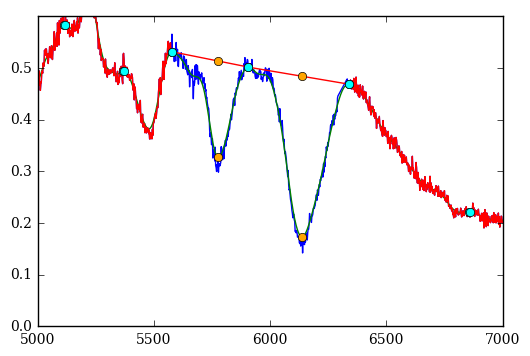

SN07ba_070409_b01_BAA_IM.dat 1.89 0.599424031436 Check:  0.003 20.8767979803 19.5777983695


In [20]:
all_dm15s_med = []
all_ratios_med = []
i=0
bad_measurements = ['sn2004dt-20040816.413-ui-corrected.flm','sn1997bp-19970407.42-mmt.flm','sn2003W-20030207.40-fast.flm',
                    'sn2005A-20050107.25-fast.flm','SN08ia_081210_r01_NTT_EF.dat','SN06mr_061109_r01_CLA_LD.dat',
                    'sn2006bt-20060428.425-ui.flm', 'sn1998es-19981125-ui-corrected.flm','sn1999aa-19990223-ui.flm',
                    'sn1999dq-19990911.46-fast.flm','sn2001V-20010301.47-fast.flm','sn2007S-20070209.30-fast.flm',
                    'SN08fp_080921_b01_DUP_WF.dat','sn2001bf-20010516-ui-corrected.flm','sn2006cz-20060626.304-ui.flm',
                    'sn1999cl-19990612.17-fast.flm','sn2005el-20050928.47-fast.flm']
for sn_arr in sn_arrays_med:
    print i
    dm15_bin = []
    ratio_bin = []
    for SN in sn_arr:
        if SN.dm15_source != None:
            dm15 = SN.dm15_source
        else:
            dm15 = SN.dm15_from_fits
        var = 1./SN.ivar
        if SN.source != 'swift_uv' and SN.filename not in bad_measurements:
            print np.median(SN.flux[SN.x1:SN.x2]), np.median(SN.ivar[SN.x1:SN.x2])
#             vexp, SNR = sa.find_vexp(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], var_y = var[SN.x1:SN.x2])
            vexp, SNR = sa.autosmooth(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], var_y = var[SN.x1:SN.x2])
            r = sa.measure_si_ratio(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], varflux = var[SN.x1:SN.x2], vexp=vexp, dm15 = dm15)
            print SN.filename, dm15, r, 'Check: ', vexp, SNR, SN.SNR
            dm15_bin.append(dm15)
            ratio_bin.append(r)
    all_dm15s_med.append(dm15_bin)
    all_ratios_med.append(ratio_bin)
    i+=1

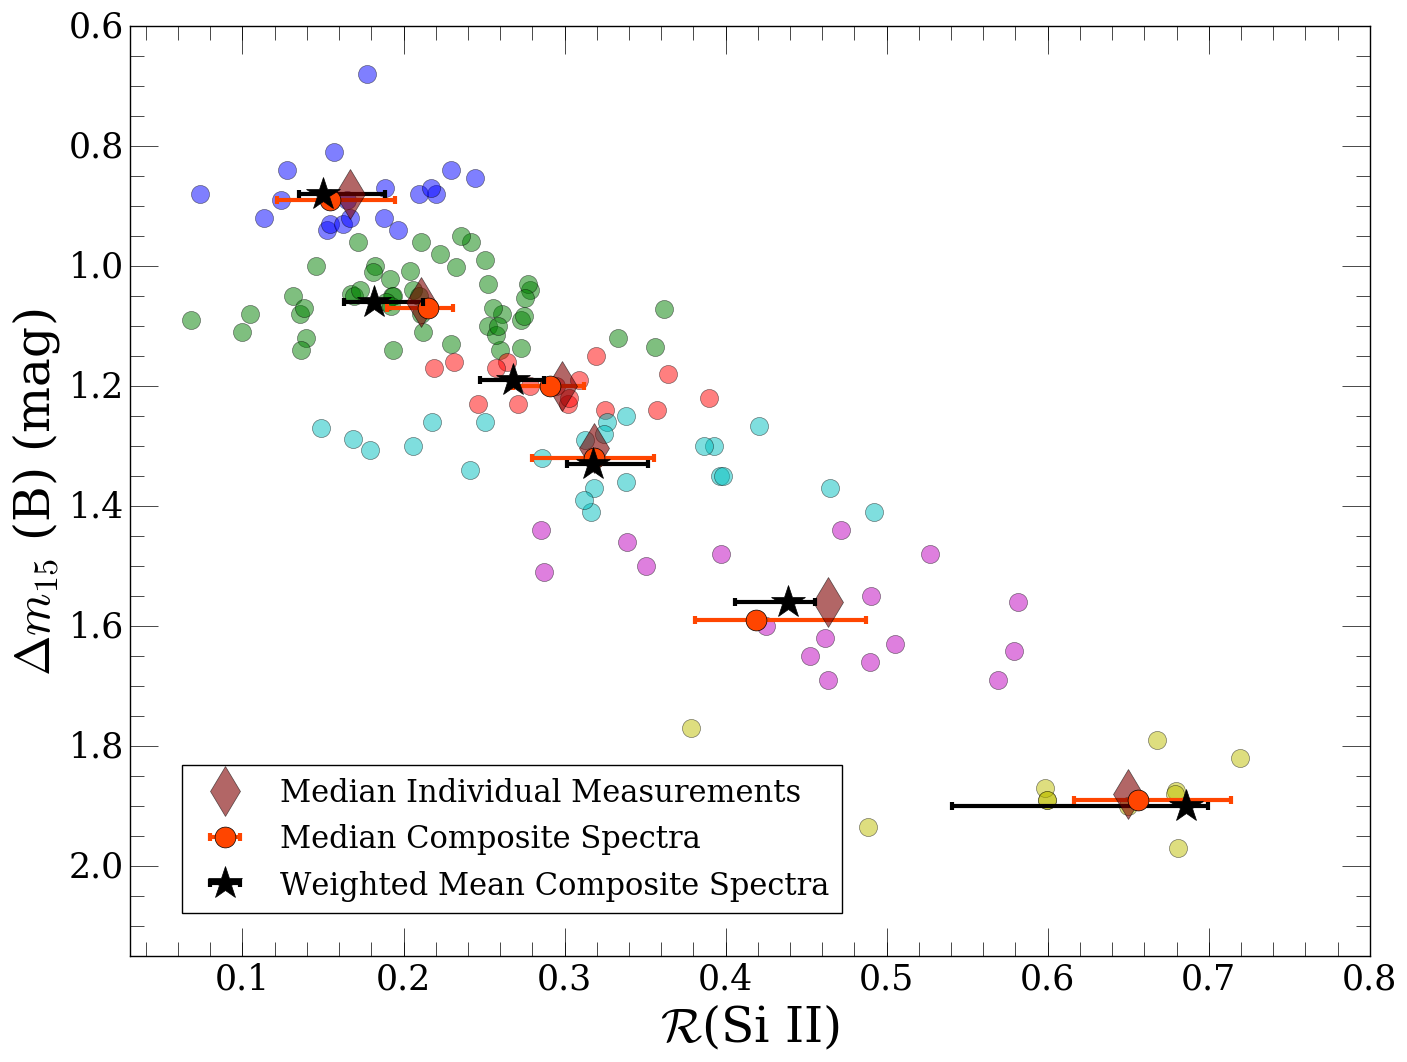

In [53]:
plt.rc('font', family='serif')
fig, ax = plt.subplots(1,1)
fig.set_size_inches(16, 12, forward = True)
plt.minorticks_on()
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('$\mathcal{R}$(Si II)', fontsize = 35)
plt.ylabel('$\Delta m_{15}$ (B) (mag)', fontsize = 35)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
dm15_bin_medians = []
ratio_bin_medians = []
for i in range(len(all_dm15s_med)):
    dm15_bin_medians.append(np.nanmedian(all_dm15s_med[i]))
    ratio_bin_medians.append(np.nanmedian(all_ratios_med[i]))
    plt.plot(np.asarray(all_ratios_med[i]), all_dm15s_med[i], 'o', alpha=.5, markersize=13, zorder=1)
plt.plot(ratio_bin_medians, dm15_bin_medians, 'd', markersize=25, alpha=.6, color = 'maroon', label='Median Individual Measurements')
plt.errorbar(si_ratios_med, dm15s_med, xerr=errors_med, color = 'orangered', fmt='o', markersize=15, elinewidth=3, capthick=3, label='Median Composite Spectra')
plt.errorbar(si_ratios_mean, dm15s_mean, xerr=errors_mean, fmt='k*', markersize=25, elinewidth=3, capthick=3, label='Weighted Mean Composite Spectra')
plt.gca().invert_yaxis()
plt.xlim([0.03,0.8])
plt.ylim([2.15, 0.6])
# plt.legend(loc=3, fontsize = 20, numpoints=1)
plt.legend( loc=3, bbox_to_anchor=(0.03, 0.03, 0.48, 0.5), fontsize=22, numpoints=1)
plt.savefig('../../../Paper_Drafts/main_composites_updated/si_ratio_wmedian.pdf', dpi = 300, bbox_inches = 'tight')
# plt.savefig('../../../FLASH/si_ratio_median.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [38]:
test_dm15s = []
test_ratios = []
for SN in sn_arrays_med[1]:
    if SN.dm15_source != None:
        dm15 = SN.dm15_source
    else:
        dm15 = SN.dm15_from_fits
    var = 1./SN.ivar
#     r = sa.measure_si_ratio(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], varflux = var[SN.x1:SN.x2], vexp=.002, dm15 = dm15)
    print SN.filename, dm15, SN.phase

sn1998dk-19980831-ui.flm 1.05 -0.54
sn2001bf-20010516-ui-corrected.flm 0.99 1.22
sn2001da-20010716-ui-corrected.flm 1.12 -1.12
sn2001fe-20011115-ui.flm 1.0 -0.99
sn2002bo-20020322-ui-corrected.flm 1.08 -1.08
sn2002de-20020608.374-ui-corrected.flm 0.96 -0.32
sn2004dt-20040824-vis2-corrected.flm 1.14 1.38
sn2004fu-20041119-ui.flm 1.08 2.43
sn2005ag-20050212.596-br.flm 1.01576626674 0.52
sn2005cf-20050610.7-uvot.flm 1.1 -2.7
sn2005ms-20060106.400-ui.flm 0.977959604108 -1.88
sn2005na-20060105.335-ui.flm 1.09 0.03
sn2006bt-20060505.444-ui.flm 1.0 2.27
sn2006cz-20060620.266-ui.flm 1.00098460136 1.12
sn2006or-20061123.654-br.flm 1.0351558298 -2.79
sn2007a-20070113.208-br.flm 0.95 2.37
sn2007af-20070313.545-ui-corrected.flm 1.04 -1.25
sn2007bz-20070426.419-ui.flm 1.05 1.65
sn2007o-20070122.663-deimos.flm 1.08812276376 -0.33
sn1994ae-19941201.50-fast.flm 0.96 2.0
sn1996ab-19960522.37-fast.flm 1.01 1.47
sn1996bl-19961018.18-fast.flm 1.07 -2.32
sn1997dt-19971204.11-fast.flm 1.04 0.209999999999
sn

In [130]:
comp1 = comps_dm15_max_fewer_bins_med[0]
comp2 = comps_dm15_max_fewer_bins_mean[0]

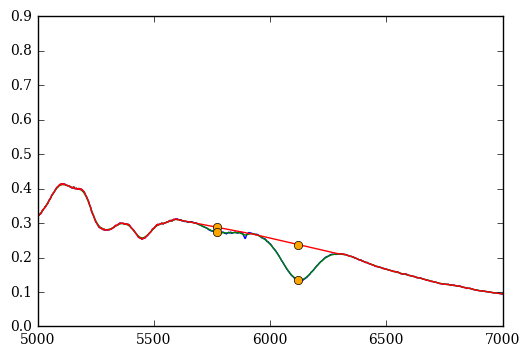

0.142816643794
done
done
done
done
done
done


In [131]:
r = sa.measure_si_ratio(comp2.wavelength[comp2.x1:comp2.x2], comp2.flux[comp2.x1:comp2.x2], vexp=.002)
print r
scale_n = np.linspace(.1,3,100)
r_dist_comps = []
noise_level_comps = []
for comp in comps_dm15_max_fewer_bins_mean:
    r_dist = []
    noise_level = []
    for n in scale_n:
        noise = np.random.normal(0., scale=n*.01, size=len(comp.flux))
        r_noise = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2]+noise[comp.x1:comp.x2], vexp=.002, plot=False)
        noise_level.append(n*.01)
        r_dist.append(r_noise)
    r_dist_comps.append(r_dist)
    noise_level_comps.append(noise_level)
    print 'done'

0.189457511023


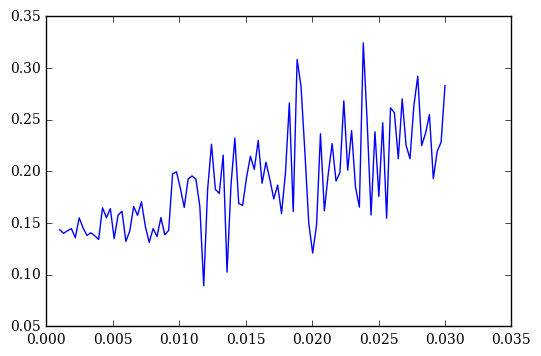

0.209406689513


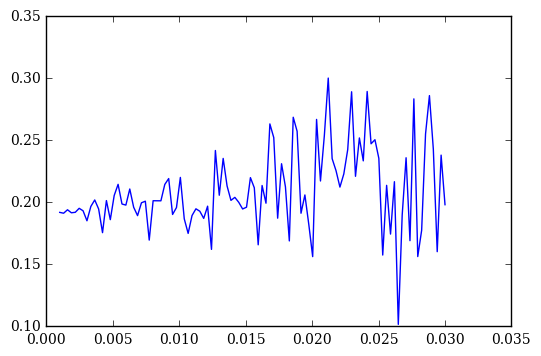

0.278637559562


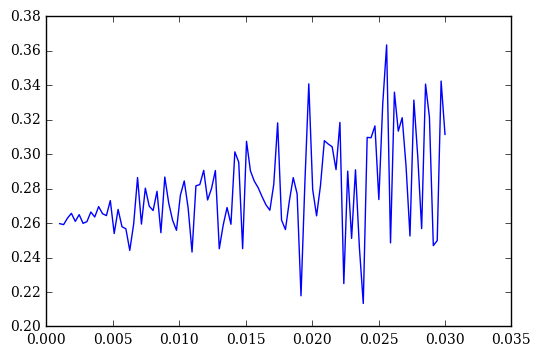

0.328324350482


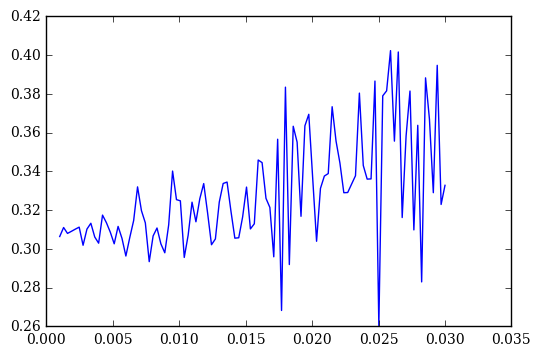

0.429638891641


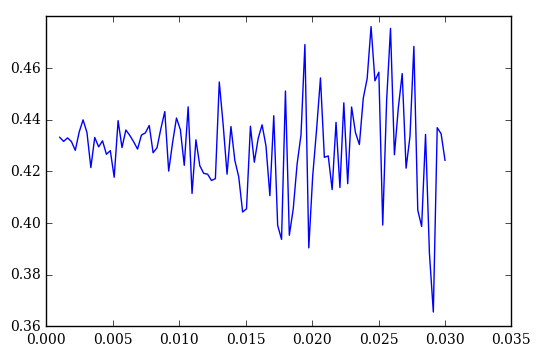

0.673744013832


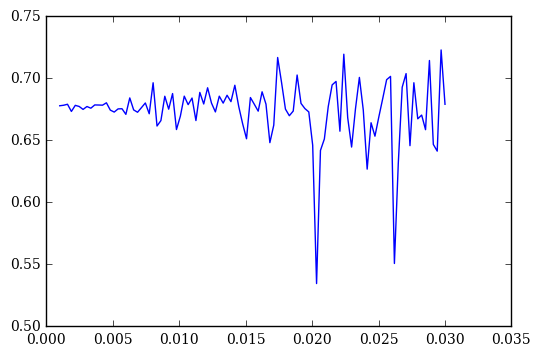

In [132]:
for i in range(len(r_dist_comps)):
    print np.average(r_dist_comps[i])
    plt.plot(noise_level_comps[i], r_dist_comps[i])
    plt.show()

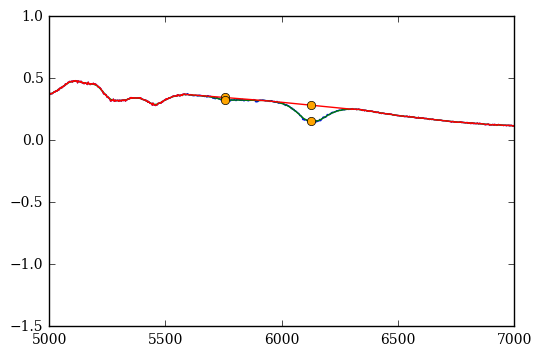

0.151973550521
done
done
done
done
done
done


In [133]:
r = sa.measure_si_ratio(comp1.wavelength[comp1.x1:comp1.x2], comp1.flux[comp1.x1:comp1.x2], vexp=.002)
print r
scale_n = np.linspace(.1,3,100)
r_dist_comps = []
noise_level_comps = []
for comp in comps_dm15_max_fewer_bins_med:
    r_dist = []
    noise_level = []
    for n in scale_n:
        noise = np.random.normal(0., scale=n*.01, size=len(comp.flux))
        r_noise = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2]+noise[comp.x1:comp.x2], vexp=.002, plot=False)
        noise_level.append(n*.01)
        r_dist.append(r_noise)
    r_dist_comps.append(r_dist)
    noise_level_comps.append(noise_level)
    print 'done'

0.176726577757


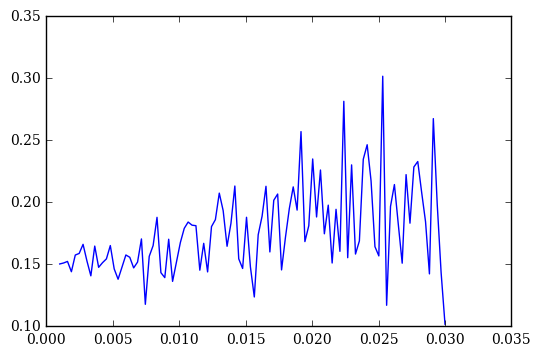

0.206528972512


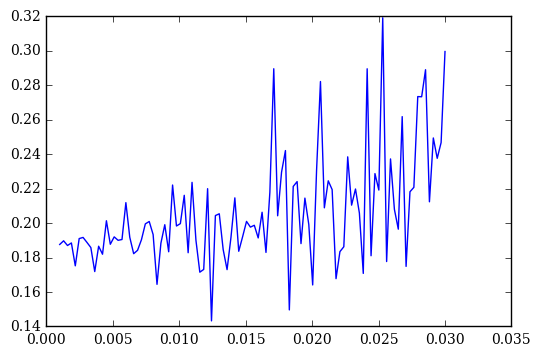

0.291981386018


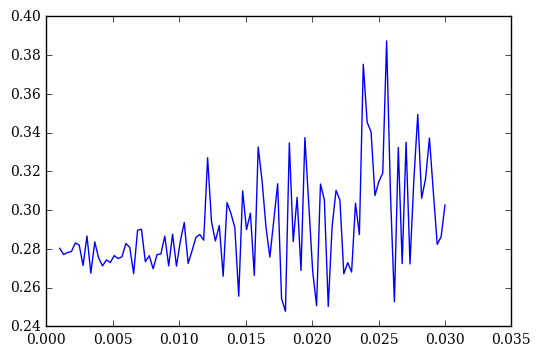

0.341507161476


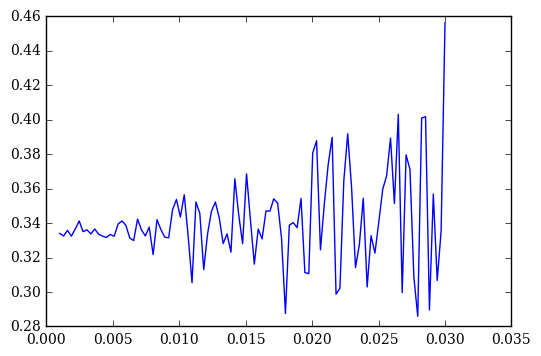

0.436933812483


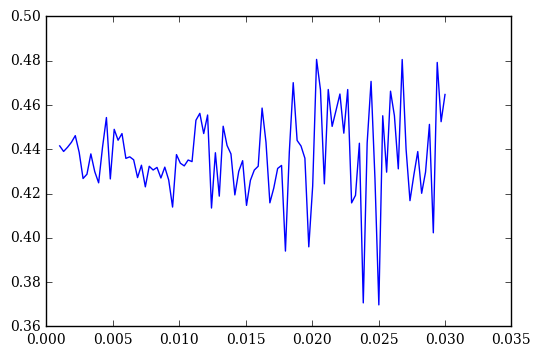

0.658354289286


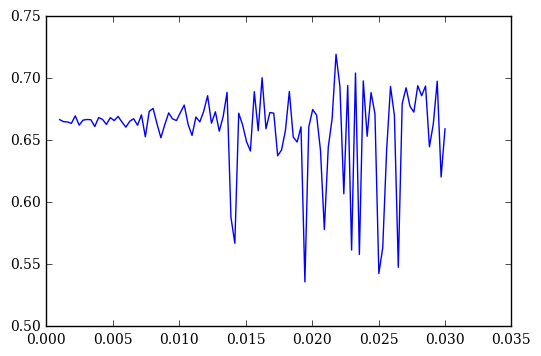

In [134]:
for i in range(len(r_dist_comps)):
    print np.average(r_dist_comps[i])
    plt.plot(noise_level_comps[i], r_dist_comps[i])
    plt.show()